## 1 导入数据

In [1]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unique_risk = pd.read_csv('unique_risk - 副本.csv')

In [3]:
#将审核结果编码为0和1，作为一个可以进行机器学习的指标 （认为“发行股份购买资产获无条件通过”比“发行股份购买资产获有条件通过”好）
#删除公司名称列，该列无法作为特征学习的指标
unique_risk['审核结果']=unique_risk['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk.head(5)

,Rc,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,0.020,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0.020,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0.045,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,0.010,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,0.005,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00


In [4]:
#按照顺序构造字典，方便将最后的特征选择结果输出为具体的属性名称
feature_dict={
0:'审核结果',
 1:'上一年归母净利润（万元）',
 2:'承诺期业绩增长率',
 3:'前三年承诺覆盖率',
 4:'静态市盈率',
 5:'动态市盈率',
 6:'成立年限',
 7:'大股东持股比例',
 8:'最近一个完整会计年度对第一大客户的销售占比',
 9:'最近一个完整会计年度对第一供应商的采购占比',
 10:'注入资产净资产账面值(万元)',
 11:'D/(D+E)',
 12:'总资产增长率' ,
 13:'归母权益增长率',
 14:'净利润增长率',
 15:'总资产周转率',
 16:'存货周转率',
 17:'应收账款周转率',
 18:'固定资产周转率',
 19:'流动比率',
 20:'资产负债率',
 21:'经营杠杆（EBITDA/EBIT)',
 22:'（固定资产+土地）/归母权益',
 23:'在建工程/归母权益',
 24:'净资产收益率',
 25:'毛利率',
 26:'经营性现金流/收入',
 27:'研发支出占比'
}

In [5]:
target=unique_risk['Rc']

In [6]:
data=unique_risk.drop(labels=['Rc'],axis=1)
data.head(5)

,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,最近一个完整会计年度对第一供应商的采购占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,0.41,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,0.13,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,0.31,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,0.07,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,0.14,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00


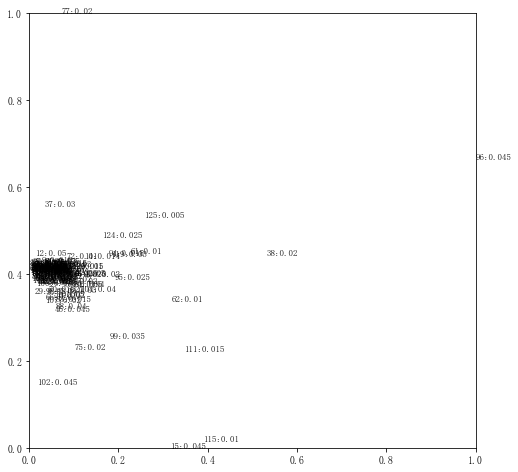

In [7]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,init='pca',random_state=23)
X_tsne=t_sne.fit_transform(data)

"嵌入空间可视化"
x_min,x_max=X_tsne.min(0),X_tsne.max(0)
X_norm=(X_tsne-x_min)/(x_max-x_min)
plt.figure(figsize=(8,8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i,0],X_norm[i,1],str(str(i)+":"+str(target[i])),fontdict={'weight':'bold','size':9})
plt.show()

In [8]:
#存储列名，用于展示结果
columns=data.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X = ss.fit_transform(data)
y=unique_risk['Rc']

In [10]:
#抽取 90% 的数据作为训练集，10%的数据作为测试集，用来展示模型的结果。
#实际是在完成特征选择、调参等一系列过程后，用所有已知数据训练得到最终模型，保存模型文件,进行使用。
#并定期重新更新数据集（一般会设定一个窗口），定期重新训练、更新模型。
#由于抽样是随机的，为了使结果具有可复现性，这里额外设定了一个随机数种子 random_state=22
from sklearn.model_selection import train_test_split
train, test = train_test_split(unique_risk, test_size = 0.1,random_state=22)

In [11]:
#分解成为特征矩阵和结果矩阵
train_X = train.drop(labels=["Rc"], axis=1)
train_y=train['Rc']

test_X= test.drop(labels=["Rc"], axis=1)
test_y =test['Rc']

In [12]:
from sklearn.preprocessing import MinMaxScaler
# 采用 Min_Max 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = MinMaxScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [13]:
#PowerTransformer 类提供了两种幂变换，Yeo-Johnson transform 和 the Box-Cox transform
#df_amp = power_transform(df_amp, method='yeo-johnson') 
#我觉得没有必要，因为我用Min_MaxScaler，没有必要将数据转换成符合正态分布
#但Min_MaxScaler的问题在于 如果新的样本某个属性的值在值域外，则需要重新对数据进行Min_MaxScaler 

#不使用StandarScaler的问题在于  训练样本不够多，且不一定符合正态分布。使用样本估计的标准差可能和假设空间实际额标准差有差别

进行异常值检测。后续结果表明，效果并不好，对于回归问题而言不是必要步骤。

In [50]:
from matplotlib.lines import Line2D

In [51]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=13)
res=clf.fit_predict(ss.fit_transform(unique_risk))

In [52]:
np.where(res==-1)

(array([  2,   9,  12,  13,  37,  40,  47,  69,  71,  77,  80,  86,  96,
         98,  99, 118, 121, 123, 124, 125], dtype=int64),)

In [53]:
import collections, numpy
collections.Counter(res)

Counter({1: 108, -1: 20})

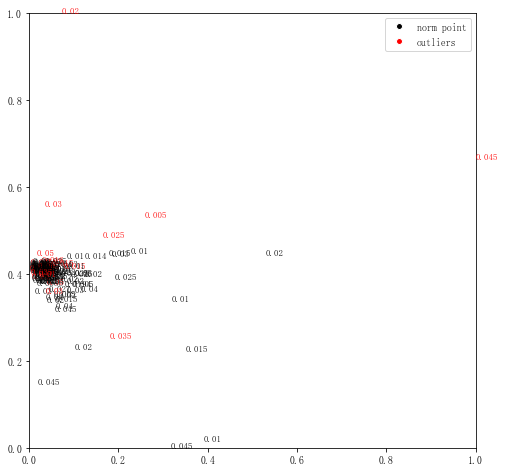

In [54]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,init='pca',random_state=23)
X_tsne=t_sne.fit_transform(data)

"嵌入空间可视化"
x_min,x_max=X_tsne.min(0),X_tsne.max(0)
X_norm=(X_tsne-x_min)/(x_max-x_min)
plt.figure(figsize=(8,8))
for i in range(X_norm.shape[0]):
    if i in list(np.where(res==-1)[0]):
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),color="red",fontdict={'weight':'bold','size':9})
    else:
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),fontdict={'weight':'bold','size':9})
plt.legend(handles=[Line2D([0],[0],marker="o",color='w',markerfacecolor='k'),Line2D([0],[0],marker="o",color='w',markerfacecolor='r')],labels=['norm point','outliers'],loc='best')
plt.show()

In [55]:
#由于是高维数据，且数据量不大，尝试用One-SVM监测异常值
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(ss.fit_transform(unique_risk))
res=clf.predict(ss.fit_transform(unique_risk))

In [56]:
np.where(res==-1)

(array([  2,   4,   5,   6,   8,   9,  12,  13,  14,  15,  16,  17,  19,
         20,  21,  26,  27,  30,  32,  37,  38,  39,  40,  41,  46,  47,
         51,  53,  54,  61,  64,  69,  71,  72,  75,  77,  79,  80,  82,
         85,  86,  88,  92,  93,  94,  96,  98,  99, 101, 102, 105, 108,
        110, 113, 115, 116, 118, 121, 122, 123, 124, 125, 126], dtype=int64),)

In [57]:
#好吧 效果并不怎么好
import collections, numpy
collections.Counter(clf.predict(ss.fit_transform(unique_risk)))

Counter({1: 65, -1: 63})

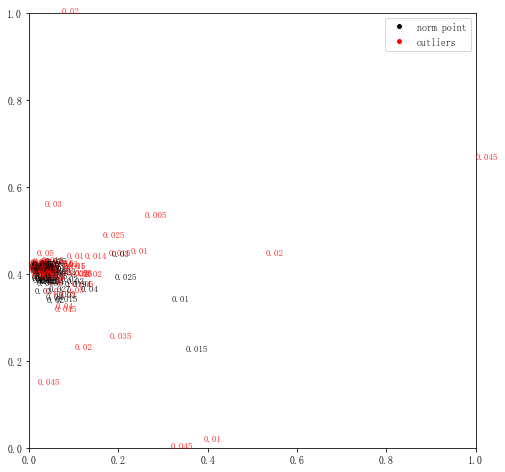

In [58]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,init='pca',random_state=23)
X_tsne=t_sne.fit_transform(data)

"嵌入空间可视化"
x_min,x_max=X_tsne.min(0),X_tsne.max(0)
X_norm=(X_tsne-x_min)/(x_max-x_min)
plt.figure(figsize=(8,8))
for i in range(X_norm.shape[0]):
    if i in list(np.where(res==-1)[0]):
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),color="red",fontdict={'weight':'bold','size':9})
    else:
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),fontdict={'weight':'bold','size':9})
plt.legend(handles=[Line2D([0],[0],marker="o",color='w',markerfacecolor='k'),Line2D([0],[0],marker="o",color='w',markerfacecolor='r')],labels=['norm point','outliers'],loc='best')
plt.show()

In [44]:
#用isolate forest试试
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(ss.fit_transform(unique_risk))
res=clf.predict(ss.fit_transform(unique_risk))

In [45]:
np.where(res==-1)

(array([12, 13, 37, 69, 77], dtype=int64),)

In [46]:
import collections, numpy
collections.Counter(res)

Counter({1: 123, -1: 5})

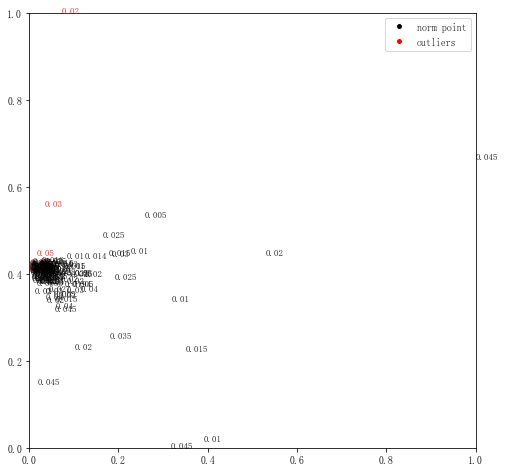

In [49]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,init='pca',random_state=23)
X_tsne=t_sne.fit_transform(data)

"嵌入空间可视化"
x_min,x_max=X_tsne.min(0),X_tsne.max(0)
X_norm=(X_tsne-x_min)/(x_max-x_min)
plt.figure(figsize=(8,8))
for i in range(X_norm.shape[0]):
    if i in list(np.where(res==-1)[0]):
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),color="red",fontdict={'weight':'bold','size':9})
    else:
        plt.text(X_norm[i,0],X_norm[i,1],str(target[i]),fontdict={'weight':'bold','size':9})
plt.legend(handles=[Line2D([0],[0],marker="o",color='w',markerfacecolor='k'),Line2D([0],[0],marker="o",color='w',markerfacecolor='r')],labels=['norm point','outliers'],loc='best')
plt.show()

根据iforest的结果对样本进行标准化

In [60]:
unique_risk_i = pd.read_csv('unique_risk_iforest.csv')
unique_risk_i['审核结果']=unique_risk_i['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk_i.head(5)

,Rc,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,0.020,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0.020,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0.045,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,0.010,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,0.005,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00


In [61]:
target_i=unique_risk_i['Rc']
y_i=unique_risk_i['Rc']

In [19]:
data_i=unique_risk_i.drop(labels=['Rc'],axis=1)
X_i = ss.fit_transform(data_i)

## 2 不进行特征工程，直接进行机器学习

### 2.1 罗列回归模型
&ensp; 这部分把所有我能想到的回归模型进行了罗列。机器学习更适合解决分类问题，在分类问题上也有更多的选择。对于回归问题，我一般会在岭回归, MLP, AdaBoost, XGBOOST 和LGBM模型中进行选择。（或者直接使用传统的数学建模，建立如微分方程模型）<br>
&ensp; 具体模型解释参考：<br>
&ensp;&ensp;https://zhuanlan.zhihu.com/p/62034592<br>
&ensp; &ensp;http://ster.im/py_sklearn_1/#Gradient-Boosting%E5%9B%9E%E5%BD%92

一般的选型逻辑如下(根据数学原理，实际效果存在例外)：<br>
线性类模型（最小二乘回归，岭回归，Lasso回归，弹性网络回归，最小角度回归）是传统的线性回归模型，一般选择1个作为对照组。<br>
KNN更适合分类问题而不是回归问题。<br>
SVM经过实践，效果并不是很好。<br>
MLP（多层感知机，或者神经网络）的训练效果会随着隐藏层的增加而不断变好，但同时也会导致模型的可解释性变差，调参难度变大，训练时间边长。具有比较好的通用性，但一般不作为首选项。<br>
决策树属于Bagging类算法和Boosting类算法的常用弱学习器，因此一般不会选用。<br>
随机森林、极端随机森林属于Bagging类算法的特殊情况，在回归问题上不如BaggingRegressor。但相比Boosting权重调整功能，Bagging相比之下表现会差一点（分类问题一般选择随机森林算法）
Boosting类算法
  AdaBoost 强调Adaptive（自适应），通过不断修改样本权重（增大分错样本权重，降低分对样本权重），不断加入弱分类器进行boosting。<br>
  Gradient Boosting类算法<br>
    GBT（梯度提升树）通过不断加入新的树，实现在残差减少（负梯度）的方向上建立一个新的模型。<br>
    LGBM (lightGBM，轻量级的高效梯度提升树)， XGBoost (eXtreme Gradient Boosting，极限梯度提升算法）  都可以看做是 GBT 的一种升级版实现。一般选择这两个模型。

Boosting V.S. 线性回归<br>
  &ensp; 从决策边界来说，线性回归的决策边界是一条直线，而Boosting类的决策边界可能是很多条线。<br>
  &ensp; Boosting并不一定总是好于线性回归。根据没有免费的午餐原则，没有一个算法是在所有问题上都能好于另一个算法的。根据奥卡姆剃刀原则，如果一个模型和线性回归在某个问题上表现接近，那么我们应该选择相对比较简单的线性回归。<br>
<br>
Gradient Boosting V.S. XGBoosting<br>
  &ensp; XGBoost 可以看做是 GBDT 的一种升级版实现。其中需要明确的一个概念是，XGBoost和LightGBM是 Boosting 框架的一种实现结构，而 GBDT 则是一种算法实现，其基分类器为 CART 树，可以处理分类、回归任务，处理分类任务则是将分类任务利用 softmax 转换为回归任务进行求解。<br>
  &ensp; XGBoost的boosting策略则与GBDT类似，区别在于GBDT旨在通过不断加入新的树最快速度降低残差，而XGBoost则可以人为定义损失函数（可以是最小平方差、logistic loss function、hinge loss function或者人为定义的loss function），借助泰勒展开（只需知道损失函数的一阶、二阶导数即可求出损失函数）转换为一元二次函数，得到极值点与对应极值即为所求。其贪婪法寻找添加树的结构以及loss function中的损失函数与正则项等一系列策略也使得XGBoost预测更准确。<br>
<br>
XGBoost V.S. LightGBM<br>
  &ensp; 树的切分策略不同：XGB 是 level-wise，而 LGB 是leaf-wise。level-wise 的建树方式对当前层的所有叶节点一视同仁，有些叶节点的分裂收益很小仍然需要进行分裂，增加了计算代价。leaf-wise 方式的精度更高，但容易过拟合，所以要控制树的最大深度。<br>
  &ensp; 在选择数据分割点时：XGB 是通过预排序的方式，空间消耗较大；LGB是通过直方图算法，不需要进行预排序，内存占用更低。相比于XGBoost，LightGBM具有训练速度更快，效率更高效；低内存的使用量的优点，但精确度不如XGBOOST。

In [ ]:
#为了保证模型和计算结果的可复现性，和之前选择测试集一样 选择随机数种子23（实际不需要，只需要多次实验取最高保存）,见前文模型罗列阶段的参数

In [16]:
#线性回归
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

# 岭回归
from sklearn.linear_model import RidgeCV
model_RidgeCV= RidgeCV()

#Lasso回归
from sklearn.linear_model import LassoCV
model_LassoCV= LassoCV()

#Elastic Net回归
from sklearn.linear_model import ElasticNetCV
model_ElasticNetCV = ElasticNetCV()

#最小角度回归（Least Angle Regression）
from sklearn.linear_model import LarsCV
model_Lars_cv = LarsCV()

#贝叶斯岭回归
from sklearn.linear_model import BayesianRidge
model_BayesianRidge=BayesianRidge()

#SGD回归
from sklearn.linear_model import SGDRegressor
model_SGDRegressor=SGDRegressor(random_state=23)

#SVM回归
from sklearn import svm
model_SVR = svm.SVR()

#KNN回归
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()

#决策树回归
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor(random_state=23)

#MLPRegressor神经网络回归
from sklearn.neural_network import MLPRegressor
model_MLPRegressor=MLPRegressor(random_state=23)

#Bagging回归
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor(random_state=23)

#随机森林回归
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20,random_state=23)#这里使用20个决策树

#ExtraTree极端随机树回归
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor(random_state=23)

#Adaboost回归
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50,random_state=23)#这里使用50个决策树

#GBRT回归#
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100,random_state=23)#这里使用100个决策树

#LGBM回归
import lightgbm as lgb
model_LGBMRegressor= lgb.LGBMRegressor()

#XGBoost回归
import xgboost as xgb
model_XGBRegressor = xgb.XGBRegressor()

### 2.2 模型效果展示
&ensp; 由于数据量不够大，为了避免采样结果对评判指标（这里使用$r^2$进行评估）产生比较大的影响，因此采用k折交叉验证（这里k取5）取平均值的方法评估模型及其超参数的优劣（对未知的测试数据是否也能有比较好的预测表现）。<br> 
&ensp; 当样本足够大的时候（比如达到假设空间的70%）,一般直接70% 30%或者60% 20% 10%的方法进行划分，对模型进行调参和评估。（实践表明大的测试样本比交叉验证效果更好）<br>
&ensp; sklearn当中使用均方误差作为评判标准时，计算的是”负均方误差“（neg_mean_squared_error），用负数表示。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示

In [ ]:
#应该使用上文的90%的训练集进行模型训练，10%的测试集进行模型效果测试。该错误已在最终版short中修复。

In [21]:
#输出R^2分数，并且展示预测值和真实值的区别
def try_different_method(model):
    model.fit(train_X,train_y)
    score = model.score(test_X, test_y)
    result = model.predict(test_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

In [68]:
#导入交叉验证包
from sklearn.model_selection import cross_val_score

In [23]:
#交叉验证 计算平均值
from sklearn.model_selection import cross_val_score
score=[]
score=cross_val_score(model_LinearRegression,X,y,cv=5,scoring='r2')
score.mean()

-2.3879831764782344

In [24]:
#交叉验证 计算平均值
from sklearn.model_selection import cross_val_score
score=[]
score=cross_val_score(model_LinearRegression,X_i,y_i,cv=5,scoring='r2')
score.mean()

-4.825236540410306

In [25]:
score=[]
score=cross_val_score(model_RidgeCV,X,y,cv=5,scoring='r2')
score.mean()

0.08035119651008613

In [26]:
score=[]
score=cross_val_score(model_RidgeCV,X_i,y_i,cv=5,scoring='r2')
score.mean()

-0.0667153540635996

In [27]:
score=[]
score=cross_val_score(model_LassoCV,X,y,cv=5,scoring='r2')
score.mean()

0.020844262878617847

In [28]:
score=[]
score=cross_val_score(model_LassoCV,X_i,y_i,cv=5,scoring='r2')
score.mean()

-0.0229547187359894

In [30]:
score=[]
score=cross_val_score(model_ElasticNetCV,X,y,cv=5,scoring='r2')
score.mean()

0.02143213718557364

In [31]:
score=[]
score=cross_val_score(model_ElasticNetCV,X_i,y_i,cv=5,scoring='r2')
score.mean()

-0.02295622341434409

In [32]:
score=[]
score=cross_val_score(model_Lars_cv,X,y,cv=5,scoring='r2')
score.mean()

0.03414132063387072

In [33]:
score=[]
score=cross_val_score(model_Lars_cv,X_i,y_i,cv=5,scoring='r2')
score.mean()

-0.028009821145844205

到此 iforest删除的点并没有提升拟合的效果。 iforest可能还是更适合分类问题。具体原因有待研究

In [34]:
score=[]
score=cross_val_score(model_BayesianRidge,X,y,cv=5,scoring='r2')
score.mean()

0.08023084383704904

In [35]:
score=[]
score=cross_val_score(model_SGDRegressor,X,y,cv=5,scoring='r2')
score.mean()

-0.0648424172393461

In [36]:
score=[]
score=cross_val_score(model_SVR,X,y,cv=5,scoring='r2')
score.mean()

-0.18683288553527677

In [37]:
score=[]
score=cross_val_score(model_SVR,X_i,y_i,cv=5,scoring='r2')
score.mean()

-0.2803162865912282

In [38]:
score=[]
score=cross_val_score(model_KNeighborsRegressor,X,y,cv=5,scoring='r2')
score.mean()

-0.03335096310374754

In [39]:
score=[]
score=cross_val_score(model_DecisionTreeRegressor,data,target,cv=5,scoring='r2')
score.mean()

-0.9769629065319826

In [41]:
score=[]
score=cross_val_score(model_MLPRegressor,data,target,cv=5,scoring='r2')
score.mean()

-1300114156.8821082

In [42]:
score=[]
score=cross_val_score(model_BaggingRegressor,X,y,cv=5,scoring='r2')
score.mean()

0.04909329723204951

In [43]:
score=[]
score=cross_val_score(model_RandomForestRegressor,X,y,cv=5,scoring='r2')
score.mean()

0.0049662839190136145

In [44]:
score=[]
score=cross_val_score(model_ExtraTreeRegressor,X,y,cv=5,scoring='r2')
score.mean()

-0.9313446452107994

**为什么部分算法每次调用得分不同。**<br>
&ensp; 不同于具有解析解的模型。计算AdaBoost、神经网络参数的过程是随机的。计算参数时会随机选择初始点；计算过程用到了随机梯度下降等方法，因此在相同超参数的情况下，每次参数的计算结果都不相同。<br>
&ensp; 在训练样本和超参数确定的情况下，尽管最后的参数矩阵有较大的区别，但其效果一般都能收敛在一个比较小的区间内。<br>
www.zhihu.com/question/294058968/answer/489457138 <br>
www.jianshu.com/p/c91939096b0e/ <br>

In [45]:
model_a=ensemble.AdaBoostRegressor(n_estimators=50).fit(train_X,train_y)  #确定模型的系数
#只展示每个depth=3的决策树的权重
#model_a.base_estimator_
#model_a.estimators_
model_a.estimator_weights_

array([1.46038334, 1.18586704, 1.2708045 , 1.1525149 , 1.28891167,
       1.46069285, 1.209707  , 1.36594795, 0.88595809, 1.32806555,
       1.1903584 , 1.36614857, 1.31064652, 1.43988722, 1.23717439,
       1.22960756, 1.19500984, 1.52143642, 1.17256623, 0.95960508,
       1.15722702, 1.11990522, 1.20907544, 0.99669977, 1.10040212,
       0.98747052, 1.16943767, 1.26420444, 1.32280927, 0.93522706,
       1.33701948, 0.97565571, 0.9231146 , 1.25225205, 1.34778793,
       1.29893789, 1.50419823, 1.18006886, 1.16789983, 1.30133752,
       1.04415449, 1.11800992, 1.2838593 , 1.46431677, 1.20266746,
       1.28300639, 0.85148489, 1.06866122, 1.35836331, 0.89721107])

In [46]:
model_a.score(test_X, test_y)  #测试集结果

-0.5659518318709198

In [47]:
model_b=ensemble.AdaBoostRegressor(n_estimators=50).fit(train_X,train_y)
#model_a.base_estimator_
#model_a.estimators_
model_b.estimator_weights_

array([0.94558686, 1.33497696, 0.89351814, 1.16352894, 1.24671877,
       1.32606879, 1.17563816, 1.36116725, 1.21501245, 0.82116014,
       1.14650442, 1.05866049, 1.59835254, 1.01170852, 0.84101487,
       1.12598118, 1.23629707, 1.29333917, 1.16520989, 1.1179118 ,
       0.9270017 , 1.19017559, 1.33880112, 1.26752529, 1.02146036,
       0.96565166, 1.43585819, 0.84829069, 1.11725853, 1.28445443,
       1.24477556, 1.33107873, 0.9618262 , 1.05471083, 1.09290011,
       1.42014146, 1.19803833, 1.34823388, 1.05115272, 0.79085444,
       1.13165208, 1.15738008, 0.98447347, 1.10934628, 1.01384126,
       1.30190791, 1.21379293, 1.32284913, 0.90700764, 1.25814449])

In [48]:
model_b.score(test_X, test_y)  #测试集结果

-0.6822658272676874

In [49]:
#通过如下代码用于将根据超参数和训练集训练出来的模型的参数进行持久化，保证模型的效果
import joblib
joblib.dump(model_b, 'AdaBoostRegressor_parameter.pkl') #保存fit()结果  
model_c = joblib.load('AdaBoostRegressor_parameter.pkl')  #加载文件

In [50]:
model_c.score(test_X, test_y)  #测试集结果

-0.6822658272676874

In [51]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,X,y,cv=5,scoring='r2')
score.mean()

0.1107560988682919

In [52]:
score=[]
score=cross_val_score(model_GradientBoostingRegressor,X,y,cv=5,scoring='r2')
score.mean()

-0.0299437086314825

In [53]:
score=[]
score=cross_val_score(model_LGBMRegressor,X,y,cv=5,scoring='r2')
score.mean()

0.03021602063851203

In [54]:
score=[]
score=cross_val_score(model_XGBRegressor,X,y,cv=5,scoring='r2')
score.mean()

-0.2548553001380559

在不调参以及进行特征选择的基础上，通过交叉验证得到各模型结果如下（待根据最新结果修改）<br>

| 模型	|  $R^2$	|结果是否稳定 |
|- |- | - |
Adaboost回归|	0.1108 |	不稳定
岭回归	   |  0.0803 |	稳定
贝叶斯岭回归 |	0.0802 |	稳定
Bagging回归 |	0.0491 |	不稳定
最小角度回归 |0.0341 |	稳定
LGBM回归	 |            0.0302 |	稳定
Elastic Net回归 |	0.0214 |	稳定
Lasso回归	   |        0.0208 |	  稳定
随机森林回归 |	0.0050 |	不稳定
GBRT回归 |   -0.0299 |	不稳定
KNN回归  |  -0.0333 |	稳定
SGD回归 |    -0.0648 |	不稳定
SVM回归	 |    -0.18683 |	稳定
XGBoost回归 |	-0.2549 |	稳定
极端随机树回归 |	-0.9313 |	不稳定
决策树回归 |	-0.9770 |	不稳定
线性回归 |	-2.3880 |	稳定
神经网络回归 |	-1300114156.88 | 不稳定

### 2.3 模型调参
&ensp; 超参数值得是用来确定模型的一些参数，比如学习速率，决策树的深度，神经网络中的层数和神经元个数等。参数是根据超参数和训练集自动学习出来的变量，比如权重,系数。<br>


| 机器学习算法 | 普通参数举例 | 超参数举例 |
| --| --| --|
| 决策树 | 在每个节点上选择的输入变量、每个节点上选择的阈值 | 每个叶节点所应包括的最少数据量，训练后的剪枝（pruning）策略 |
| 随机森林 | 同上 | 决策树的数量，输入变量的数量 |
| 支持向量机 | 支持向量（support vector）的选择，每个支持向量的拉格朗日乘数 |	核（kernel）的选择，正则化常量C和核函数的超参数 |
| 神经网络 |	每层的权重 |	隐藏层的数量，每层的神经元数量，训练的epoch，学习率等 |
| K近邻 | (Lazy算法，不进行任何训练)	|	近邻K的选择，距离函数的选择，初始化选择等 |
| 朴素贝叶斯 |	每一类的先验概率 |	数值属性用核数密度估计量或正态分布，核密度估计量的窗口宽度 |

&ensp; 调参指的都是调整超参数,使得模型具有更好的表现。一般来说越复杂的超参数(神经网络中更多的感知机，决策树中数的深度越大，线性拟合中x的最高指数), 会使得模型在训练集上具有更好的表现，但容易导致模型过拟合，在未知数据集上表现不佳。因此，使用K折交叉验证或者划分训练和测试集的方法确定来确定最佳的模型+超参数组合。<br>
&ensp;调参的一般方法就是通过GridSearch函数将所有参数进行组合，通过交叉验证或者测试集的方法输出最好的模型（一般会选择准确率或者$R^2$，但可能也会关注比如预测时间、训练时间等指指标）。由于会遍历所有组合，一般会选择一个范围，接着逐步进行逼近。另外，为了避免陷入局部最优，可以尝试几个不同的区间进行逼近。

&ensp; 需要注意的是，K折交叉验证会生成K个参数不同的模型，这些模型都不是我们的最终模型，K折交叉验证主要是用来测试这个模型和超参数组合在假设空间上的表现，并不是一个生成训练模型的方法。我们使用通过K折交叉验证选出的最好的模型+超参数组合，训练目前已有数据得出的参数+模型才是最终持久化保存并使用的模型。<br>

In [ ]:
#在shourt中对最后使用的模型进行了更精细的调参

**对SVR模型进行调参**

In [75]:
from sklearn.model_selection import GridSearchCV  


grid = GridSearchCV(svm.SVR(), param_grid={"kernel":["linear", "poly", "rbf", "sigmoid"],"C":[0.1, 1, 10, 100], "gamma":[10,1, 0.1, 0.01]}, cv=5)  
grid.fit(X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 10, 'kernel': 'linear'} with a score of -0.19


**对MLP神经网络进行调参**<br>
&ensp;默认只有一层(200,)的效果很差。

In [57]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    #为了加快运行速度，删除了从(30,30,30) (30,)开始的迭代  五层或者更深可以优化效果，但会让模型过于复杂
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(5,3,3,3),(5,5,5,5),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.1,1,10],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of -0.04


In [18]:
model_MLPRegressor=MLPRegressor(activation='logistic', alpha=0.0001, hidden_layer_sizes=(5,5,5), learning_rate='constant', solver='lbfgs',random_state=23)

**对XGBoost进行调参**

In [58]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'booster': ['gbtree','dart'], 
    'eta': [0.1, 0.2, 0.3, 0.4],
    'gamma':[0,1,10],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 10 ,100]
    
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'booster': 'gbtree', 'eta': 0.2, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 10} with a score of 0.10


In [17]:
model_XGBRegressor= xgb.XGBRegressor(booster='gbtree', eta= 0.2, gamma= 0, max_depth= 7, min_child_weight= 10)

**对LGBM进行调参**

In [61]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 1, 'min_child_samples': 19, 'min_child_weight': 0.001, 'num_leaves': 20} with a score of 0.07


In [16]:
model_LGBMRegressor=lgb.LGBMRegressor(cat_smooth=0, max_depth=1, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

**对AdaBoost进行调参**

In [64]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),tree.DecisionTreeRegressor(max_depth=1),tree.DecisionTreeRegressor(max_depth=5),model_RidgeCV],
    'n_estimators':[25,50,100,200,300],
    'learning_rate':[0.05,0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 200} with a score of 0.15


In [15]:
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.1, n_estimators=200)

**调参结果对比**<br>

| 模型 | 调参前 | 调参后 |
|------|----------|------|
| Adaboost回归  | 0.1108 | 0.147104   |
| XGBOOST回归   | -0.2549 | 0.09732   |
| LGBM回归     | 0.0302 | 0.068588    |
| 神经网络回归  | -1300114156.88 | -0.03711 |
| SVM回归     | -0.18683 | -0.18683   |

除了SVM算法外，其余算法通过调参都能显著提高算法的效果

**其他的弱分类器AdaBoost (只是探索，不纳入正文)**

In [75]:
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(model_Lars_cv,random_state=23,learning_rate=0.1, n_estimators=200)

In [76]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,data,target,cv=5,scoring='r2')
score.mean()

0.09964488521579595

In [14]:
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(model_LGBMRegressor,random_state=23,learning_rate=0.1, n_estimators=200)

In [116]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,data,target,cv=5,scoring='r2')
score.mean()

0.14543581205950837

In [13]:
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(MLPRegressor(activation='tanh', alpha=0.0001, hidden_layer_sizes=(3,3,3), learning_rate='adaptive', solver='lbfgs'),random_state=23,learning_rate=0.1, n_estimators=200)

In [80]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,data,target,cv=5,scoring='r2')
score.mean()

-0.03579260809586169

根据结果，弱分类器对模型有比较大的影响

### 2.4 异常值测试

传统的ifroest和one-svm对于异常值监测的效果并不好，尝试通过留一误差法检测异常值。
具体异常点监测的方法有待后续进一步研究

In [56]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

**线性回归留一验证**

In [77]:
result_list=[]
for train_index, test_index in loo.split(X):
    train_X, test_X= X[train_index], X[test_index]
    train_y, test_y=y[train_index], y[test_index]
    model_LinearRegression.fit(train_X,train_y)
    result=model_LinearRegression.predict(test_X)
    result_list.append(result.tolist()[0])

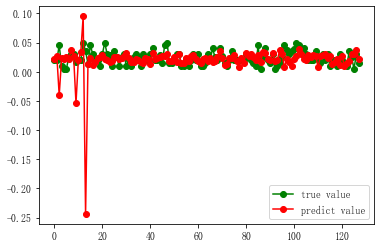

In [78]:
plt.figure()
plt.plot(np.arange(len(result_list)), target,'go-',label='true value')
plt.plot(np.arange(len(result_list)),score_dic,'ro-',label='predict value')
plt.legend()
plt.show()

In [89]:
from pandas import Series,DataFrame
import pandas as pd
data = {
       'true_y':target,
       'predict_value':result_list,
       'difference':np.abs(result_list-target)}
        
df = DataFrame(data)
df.sort_values(by=['difference'],ascending=False)

,true_y,predict_value,difference
13,0.035,-0.243687,0.278687
2,0.045,-0.040503,0.085503
9,0.016,-0.053727,0.069727
12,0.050,0.095060,0.045060
96,0.045,0.007695,0.037305
...,...,...,...
91,0.030,0.031317,0.001317
58,0.030,0.029013,0.000987
10,0.020,0.020798,0.000798
26,0.025,0.024764,0.000236


**RidgeCV留一验证**

In [90]:
result_list=[]
for train_index, test_index in loo.split(X):
    train_X, test_X= X[train_index], X[test_index]
    train_y, test_y=y[train_index], y[test_index]
    model_RidgeCV.fit(train_X,train_y)
    result=model_RidgeCV.predict(test_X)
    result_list.append(result.tolist()[0])

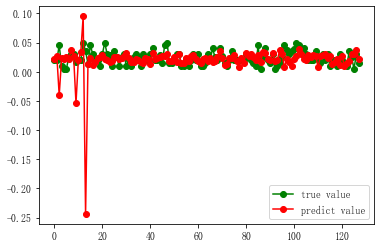

In [91]:
plt.figure()
plt.plot(np.arange(len(result_list)), target,'go-',label='true value')
plt.plot(np.arange(len(result_list)),score_dic,'ro-',label='predict value')
plt.legend()
plt.show()

In [95]:
from pandas import Series,DataFrame
import pandas as pd
data = {
       'true_y':target,
       'predict_value':result_list,
       'difference':np.abs(result_list-target)}
        
df = DataFrame(data)
df.sort_values(by=['difference'],ascending=False)

,true_y,predict_value,difference
21,0.050,0.023253,0.026747
101,0.050,0.026103,0.023897
96,0.045,0.021503,0.023497
66,0.040,0.018788,0.021212
5,0.005,0.025547,0.020547
...,...,...,...
76,0.020,0.019681,0.000319
91,0.030,0.029687,0.000313
20,0.030,0.029781,0.000219
52,0.030,0.030036,0.000036


**AdaBoost留一验证**

In [98]:
result_list=[]
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.1, n_estimators=200)
for train_index, test_index in loo.split(X):
    train_X, test_X= X[train_index], X[test_index]
    train_y, test_y=y[train_index], y[test_index]
    model_AdaBoostRegressor.fit(train_X,train_y)
    result=model_AdaBoostRegressor.predict(test_X)
    result_list.append(result.tolist()[0])

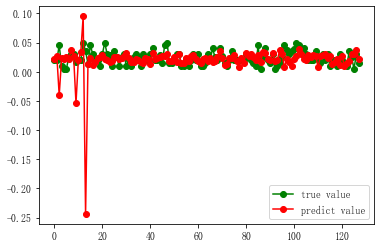

In [99]:
plt.figure()
plt.plot(np.arange(len(result_list)), target,'go-',label='true value')
plt.plot(np.arange(len(result_list)),score_dic,'ro-',label='predict value')
plt.legend()
plt.show()

In [100]:
from pandas import Series,DataFrame
import pandas as pd
data = {
       'true_y':target,
       'predict_value':result_list,
       'difference':np.abs(result_list-target)}
        
df = DataFrame(data)
df.sort_values(by=['difference'],ascending=False)

,true_y,predict_value,difference
21,0.050,0.023582,0.026418
47,0.050,0.025294,0.024706
85,0.045,0.021194,0.023806
12,0.050,0.027429,0.022571
30,0.010,0.031352,0.021352
...,...,...,...
79,0.020,0.019547,0.000453
35,0.025,0.024805,0.000195
8,0.030,0.030047,0.000047
117,0.020,0.019956,0.000044


从结果上来看，留一验证不适合作为异常值剔除的方法。每种模型给出的差值前5位都不相同。可能13 2 12是异常值

## 3 特征选择

&emsp;不考虑通过Polynomial Features构造 如$x^2$, $xy$等多项式特征，我觉得这种特征对于该问题没有意义。也不考虑对年限等进行取对数操作。

### 3.1 特征选择: Filter
&emsp;&emsp;基本思路是通过统计学变量，计算自变量和目标变量之间的关联，选择相关性比较高的属性。常用的统计学变量和方法有相关系数，卡方检验，信息增益<br>

**相关系数**

<AxesSubplot:>

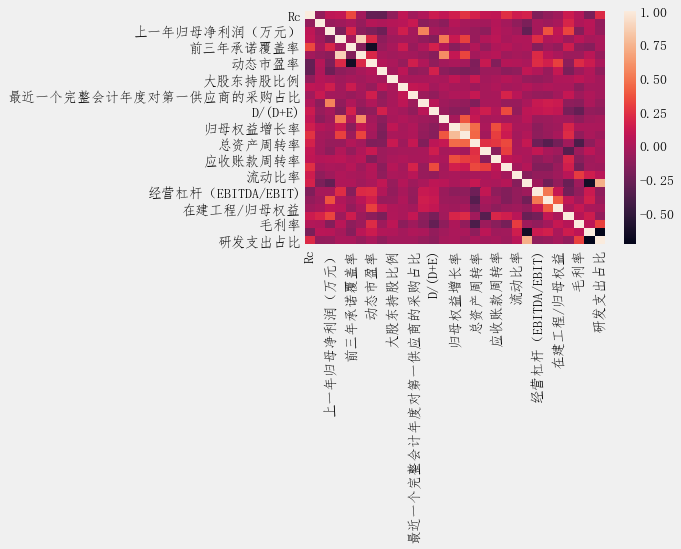

In [76]:
# 用Seaborn 生成热图
import seaborn as sns
import matplotlib.style as style
# 选用一个干净的主题
style.use('fivethirtyeight')
sns.heatmap(unique_risk.corr())

In [77]:
# 存储特征
highly_correlated_features =unique_risk.columns[unique_risk.corr()['Rc'].abs() > .2]
highly_correlated_features=highly_correlated_features.drop('Rc') 
highly_correlated_features

Index(['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率', '研发支出占比'], dtype='object')

In [78]:
new_data=unique_risk[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
new_X=ss.fit_transform(new_data)

In [79]:
score=[]
score=cross_val_score(model_LinearRegression,new_X,y,cv=5,scoring='r2')
score.mean()

0.17268583147202016

In [80]:
score=[]
score=cross_val_score(model_RidgeCV,new_data,y,cv=5,scoring='r2')
score.mean()

0.15225484849226573

In [81]:
score=[]
score=cross_val_score(model_ElasticNetCV,new_X,y,cv=5,scoring='r2')
score.mean()

0.14041247587704453

In [82]:
score=[]
score=cross_val_score(model_Lars_cv,new_X,y,cv=5,scoring='r2')
score.mean()

0.11731172127025753

In [83]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    #为了加快运行速度，删除了从(30,30,30) (30,)开始的迭代  五层或者更深可以优化效果，但会让模型过于复杂
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(5,3,3,3),(5,5,5,5),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.1,1,10],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of 0.11


In [84]:
score=[]
score=cross_val_score(model_SVR,new_X,y,cv=5,scoring='r2')
score.mean()
#没啥变化

-0.18683288553527677

In [85]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后还是比较差

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 22, 'min_child_weight': 0.001, 'num_leaves': 20} with a score of 0.05


In [86]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2, 0.3, 0.4],
    'gamma':[0,1,10],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 10 ,100]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后还是比较差

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1} with a score of 0.07


In [87]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),tree.DecisionTreeRegressor(max_depth=1),tree.DecisionTreeRegressor(max_depth=5),model_RidgeCV],
    'n_estimators':[25,50,100,200,300],
    'learning_rate':[0.05,0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#效果变差了

The best parameters are {'base_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])), 'learning_rate': 0.1, 'n_estimators': 25} with a score of 0.17


**使用假设检验**

In [29]:
#ANOVA测试
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [30]:
#保留一半，14个特征
k_best=SelectKBest(f_regression, k=14)

In [31]:
f_regression(X, y, center=True)

(array([ 1.05646898,  0.80048802,  0.97146867, 16.25759539,  0.13201371,
        10.58108109, 11.44741631,  1.40549044,  0.94256062,  0.2007538 ,
         0.05232384,  2.38037109,  1.10099705,  3.26189126,  9.13512245,
         4.12692227,  1.23307206,  0.83064585,  8.01458958,  2.75695357,
         4.13572041,  3.86502493,  1.29785984,  0.23406864,  2.3917066 ,
         0.11854047,  4.85175093,  6.33932883]),
 array([3.05991030e-01, 3.72653415e-01, 3.26203060e-01, 9.51235230e-05,
        7.16962089e-01, 1.46650223e-03, 9.54494865e-04, 2.38037453e-01,
        3.33480207e-01, 6.54882552e-01, 8.19438703e-01, 1.25376194e-01,
        2.96055842e-01, 7.32943477e-02, 3.03812448e-03, 4.43092401e-02,
        2.68925056e-01, 3.63826212e-01, 5.40287860e-03, 9.93190991e-02,
        4.40870737e-02, 5.15014091e-02, 2.56765737e-01, 6.29363040e-01,
        1.24488422e-01, 7.31196839e-01, 2.94369453e-02, 1.30625656e-02]))

In [32]:
k_best.fit_transform(X, y)

array([[0.53125   , 0.29320229, 0.44033039, ..., 0.55206463, 0.69047619,
        0.        ],
       [0.71875   , 0.24570025, 0.18684136, ..., 0.57989228, 0.7172619 ,
        0.01342282],
       [0.59375   , 0.37674038, 0.10595272, ..., 0.58438061, 0.83630952,
        0.09395973],
       ...,
       [0.21875   , 0.72645373, 0.13756764, ..., 0.51885099, 0.83333333,
        0.        ],
       [1.        , 0.33128583, 0.07604671, ..., 0.57630162, 0.63690476,
        0.04362416],
       [0.46875   , 0.35380835, 0.2261464 , ..., 0.53141831, 0.68154762,
        0.01006711]])

In [33]:
k_best.pvalues_

array([3.05991030e-01, 3.72653415e-01, 3.26203060e-01, 9.51235230e-05,
       7.16962089e-01, 1.46650223e-03, 9.54494865e-04, 2.38037453e-01,
       3.33480207e-01, 6.54882552e-01, 8.19438703e-01, 1.25376194e-01,
       2.96055842e-01, 7.32943477e-02, 3.03812448e-03, 4.43092401e-02,
       2.68925056e-01, 3.63826212e-01, 5.40287860e-03, 9.93190991e-02,
       4.40870737e-02, 5.15014091e-02, 2.56765737e-01, 6.29363040e-01,
       1.24488422e-01, 7.31196839e-01, 2.94369453e-02, 1.30625656e-02])

In [34]:
p_values=pd.DataFrame({'Column': columns,'p_value':k_best.pvalues_}).sort_values('p_value')

In [35]:
p_values.head(14)

,Column,p_value
3,前三年承诺覆盖率,0.000095
6,成立年限,0.000954
5,动态市盈率,0.001467
14,净利润增长率,0.003038
18,固定资产周转率,0.005403
27,研发支出占比,0.013063
26,经营性现金流/收入,0.029437
20,资产负债率,0.044087
15,总资产周转率,0.044309
21,经营杠杆（EBITDA/EBIT),0.051501


In [36]:
p_values[p_values['p_value']<.05]

,Column,p_value
3,前三年承诺覆盖率,0.000095
6,成立年限,0.000954
5,动态市盈率,0.001467
14,净利润增长率,0.003038
18,固定资产周转率,0.005403
27,研发支出占比,0.013063
26,经营性现金流/收入,0.029437
20,资产负债率,0.044087
15,总资产周转率,0.044309


In [49]:
new_data=unique_risk[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比','经营性现金流/收入','资产负债率','总资产周转率']]
new_X=ss.fit_transform(new_data)

In [50]:
score=[]
score=cross_val_score(model_LinearRegression,new_X,y,cv=5,scoring='r2')
score.mean()

0.0796877448391859

In [51]:
score=[]
score=cross_val_score(model_RidgeCV,new_data,y,cv=5,scoring='r2')
score.mean()

0.1457552385493479

In [42]:
score=[]
score=cross_val_score(model_ElasticNetCV,new_X,y,cv=5,scoring='r2')
score.mean()

0.1205312989402012

In [43]:
score=[]
score=cross_val_score(model_Lars_cv,new_X,y,cv=5,scoring='r2')
score.mean()

0.0696779980975025

In [44]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    #为了加快运行速度，删除了从(30,30,30) (30,)开始的迭代  五层或者更深可以优化效果，但会让模型过于复杂
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(5,3,3,3),(5,5,5,5),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.1,1,10],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of 0.10


In [45]:
score=[]
score=cross_val_score(model_SVR,new_X,y,cv=5,scoring='r2')
score.mean()
#没有任何变化

-0.18683288553527677

In [46]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后还是比较差

The best parameters are {'cat_smooth': 0, 'max_depth': 1, 'min_child_samples': 22, 'min_child_weight': 0.001, 'num_leaves': 20} with a score of -0.02


In [47]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2, 0.3, 0.4],
    'gamma':[0,1,10],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 10 ,100]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后还是比较差

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1} with a score of 0.02


In [48]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),tree.DecisionTreeRegressor(max_depth=1),tree.DecisionTreeRegressor(max_depth=5),model_RidgeCV],
    'n_estimators':[25,50,100,200,300],
    'learning_rate':[0.05,0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))


The best parameters are {'base_estimator': RidgeCV(alphas=array([ 0.1,  1. , 10. ])), 'learning_rate': 0.1, 'n_estimators': 25} with a score of 0.16



**特征选择结果对比**<br>

相关系数选择结果: 前三年承诺覆盖率, 动态市盈率, 成立年限, 净利润增长率, 固定资产周转率, 研发支出占比<br>
P值选择结果：    前三年承诺覆盖率, 动态市盈率, 成立年限, 净利润增长率, 固定资产周转率, 研发支出占比',经营性现金流/收入,资产负债率,总资产周转率


| 模型 | 特征选择前 | 相关系数特征选择 | P值特征选择|
|------|----------|------| ------|
|线性回归|  -2.3880	 | 0.17268 | 0.0797 |
|岭回归 | 0.0803 |   0.1522 | 0.1458 |
| Adaboost回归  | 0.147104 | 0.17   | 0.16 |
| XGBOOST回归   | 0.09732 | 0.07   | 0.02 |
| LGBM回归     | 0.068588 |  0.05   | -0.02 |
| 神经网络回归  | -0.03711 | 0.11 | 0.10 |


&emsp;线性回归，岭回归，神经网络和AdaBoost在进行特征选择后效果有提升。Boosting类算法的效果在特征选择后变差了，具体原因有待研究。可能是因为特征的缩小导致基础决策树变得单一。因此降低了模型的效果。<br>
&emsp;p值特征选择的结果比相关性特征选择的结果差，\['经营性现金流/收入','资产负债率','总资产周转率']提供了无效信息。['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']是选择法的结果

### 3.2 特征选择：Wrapper
思路：通过目标函数来决定是否加入一个变量。

**最佳子集回归（Best Subset Regression）**<br>
&emsp;通过遍历所有可能的组合，找出最好的特征组合。<br>
由于 $C_{n}^{1}+C_{n}^{2}+C_{n}^{3}+ ... +C_{n}^{n}=2^n$  &emsp; 因此对于具有大量属性(20个以上，2^20=1048576，建议跑分布式解决)的问题，这个方法并不适用。

In [ ]:
#不运行
results = pd.DataFrame(columns=['num_features', 'features', 'R2'])


for k in range(1, X_train.shape[1] + 1):
    for subset in itertools.combinations(range(X_train.shape[1]), k):
        linreg_model = LinearRegression.fit(X_train[:, subset], y_train)
        score = linreg_model.score(X_train[:, subset],y_train)
        results = results.append(pd.DataFrame([{'num_features': k, 'features': subset,'R2': score}]))

# 根据R^2的值进行排序
results = results.sort_values('R2').reset_index()
print(results.head())

# 拟合最优模型

# get corresponding feature describe
feature_describe = data.columns.tolist()[1:-2]
best_subset_feature_index = results['features'][0]
best_subset_feature_describe = []
for index in best_subset_feature_index:
    best_subset_feature_describe.append(feature_describe[index])


best_subset_model = LinearRegression(normalize=True).fit(X_train[:, results['features'][0]], y_train)
best_subset_coefs = dict(
    zip(['Intercept'] + best_subset_feature_describe,
        np.round(np.concatenate((best_subset_model.intercept_, best_subset_model.coef_), axis=None), 3))
)

print('Best Subset Regression R2: {}'.format(np.round(results['R2'][0], 3)))
print('Best Subset Regression coefficients:', best_subset_coefs)

**feature_selection.RFECV，递归特征消除法**<BR>
&emsp;递归特征删除法,不断训练模型，每次训练完毕删除掉n个重要性低的特征，然后对新的特征再次进行训练，又一次得到特征重要性，再次删除n个重要性低的特征，直到特征数满足自己的设定。通过交叉验证来找到最优的特征数量，这里的交叉验证与我们经常见到的不同，不是不同行组合然后求平均，而是不同列的组合求均值，得到最优的特征数量。如果减少特征会造成性能损失，那么将不会去除任何特征。<br>
    &emsp;需要指出的是，由于无法证明特征选择的结果具有最优子结构性质，因此这种基于贪心算法的特征选择方法只能保证获得局部最优，无法保证获取全局最优。进一步的改进方法为基于遗传算法，设置多组特征集和随机数，选择最优解。（会导致更大的时间和空间复杂度，但无法保证能取得更好的效果）

**线性回归**

In [106]:
#对于线性回归通过RFECV进行特征选择
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator =model_LinearRegression

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False False  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True False False
  True  True  True  True]
[7 6 1 1 1 1 1 1 1 4 1 1 1 1 1 3 1 1 1 1 1 1 5 2 1 1 1 1]
22
[ -5.93811193  -6.0513864   -7.58318965 -10.84187507  -6.66798726
  -7.81429585  -4.86904181  -3.36319211  -3.42302449  -2.9826369
  -4.08119958  -3.93987421  -4.94474602  -4.43817422  -4.69917258
  -3.14225043  -3.5038364   -2.93321341  -2.82794654  -3.4742622
  -1.67098167  -1.42426553  -1.52586772  -2.67854685  -2.92218176
  -4.32562155  -3.52185152  -2.38798318]


In [107]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['承诺期业绩增长率',
 '前三年承诺覆盖率',
 '静态市盈率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 '最近一个完整会计年度对第一大客户的销售占比',
 '注入资产净资产账面值(万元)',
 'D/(D+E)',
 '总资产增长率',
 '归母权益增长率',
 '净利润增长率',
 '存货周转率',
 '应收账款周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '经营杠杆（EBITDA/EBIT)',
 '净资产收益率',
 '毛利率',
 '经营性现金流/收入',
 '研发支出占比']

In [108]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.coef_}).sort_values('feature_importances',ascending=False)

In [109]:
feature_importances_value

,Feature,feature_importances
11,净利润增长率,0.042484
0,承诺期业绩增长率,0.023463
21,研发支出占比,0.022765
15,流动比率,0.014775
14,固定资产周转率,0.012940
6,最近一个完整会计年度对第一大客户的销售占比,0.012107
8,D/(D+E),0.011512
18,净资产收益率,0.010762
16,资产负债率,0.008934
7,注入资产净资产账面值(万元),0.008182


In [110]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [111]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()

-0.5456841980383926

**AdaBoost**

In [40]:
#对于AdaBoost通过RFECV进行特征选择
#先进行调参再进行特征选择
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator = model_AdaBoostRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
28
[-0.1154436   0.03651017  0.03535986  0.08704903  0.05852098  0.07135222
  0.05495536  0.07268281  0.07568548  0.06828654  0.08678956  0.0887654
  0.0981227   0.11478075  0.10549593  0.09495024  0.10032689  0.11670463
  0.10272287  0.11637292  0.109883    0.1110891   0.11184712  0.10065195
  0.14223682  0.11355422  0.11365676  0.14710481]


In [41]:
#换个起点，先进行特征选择再进行特征选择
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator = ensemble.AdaBoostRegressor(random_state=23)

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
  True  True False  True]
[5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 4 1 1 3 1]
24
[-0.27940778 -0.20916067 -0.03107422 -0.00787837  0.10574641  0.0778029
 -0.00177553  0.04575039  0.08512745  0.06068623  0.07299984  0.06456194
  0.01797387  0.08508353  0.06669174 -0.01625428  0.125208    0.0915542
  0.11992651  0.10737702  0.11664406  0.0748832   0.09237281  0.14924186
  0.09373939  0.12492026  0.12258776  0.1107561 ]


In [42]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['上一年归母净利润（万元）',
 '承诺期业绩增长率',
 '前三年承诺覆盖率',
 '静态市盈率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 '最近一个完整会计年度对第一大客户的销售占比',
 '最近一个完整会计年度对第一供应商的采购占比',
 '注入资产净资产账面值(万元)',
 'D/(D+E)',
 '总资产增长率',
 '归母权益增长率',
 '净利润增长率',
 '总资产周转率',
 '存货周转率',
 '应收账款周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '（固定资产+土地）/归母权益',
 '净资产收益率',
 '毛利率',
 '研发支出占比']

In [43]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [44]:
feature_importances_value

,Feature,feature_importances
2,前三年承诺覆盖率,0.111421
11,总资产增长率,0.091868
1,承诺期业绩增长率,0.085245
5,成立年限,0.071511
6,大股东持股比例,0.060651
13,净利润增长率,0.049804
10,D/(D+E),0.049189
15,存货周转率,0.040782
21,净资产收益率,0.040467
19,资产负债率,0.040202


In [45]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [46]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()
#有提升

0.1661040507212207

In [47]:
#调参看看能不能更好
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),tree.DecisionTreeRegressor(max_depth=1),tree.DecisionTreeRegressor(max_depth=5),model_RidgeCV],
    'n_estimators':[25,50,100,200,300],
    'learning_rate':[0.05,0.1,0.5,0.8,1]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1, 'n_estimators': 50} with a score of 0.17


In [ ]:
#就是默认参数

**岭回归**

In [120]:
#对于岭回归通过RFECV进行特征选择
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator = RidgeCV()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False False False  True False  True  True  True  True False False  True
 False False  True False  True False  True  True  True False False False
 False  True False  True]
[13 15  3  1 10  1  1  1  1 11  5  1 16  8  1  6  1 14  1  1  1  4 12  9
  2  1  7  1]
13
[-0.0764049  -0.03507394 -0.004828    0.08084005  0.0516662   0.09327988
  0.10293847  0.10638004  0.11460655  0.07770654  0.07960413  0.10586568
  0.11600132  0.11464325  0.09056793  0.0949778   0.0954749   0.10330402
  0.09875847  0.10311531  0.09039269  0.09235508  0.07458862  0.08211235
  0.07888652  0.08095558  0.07944536  0.0803512 ]


In [121]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['前三年承诺覆盖率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 '最近一个完整会计年度对第一大客户的销售占比',
 'D/(D+E)',
 '净利润增长率',
 '存货周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '毛利率',
 '研发支出占比']

In [122]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.coef_}).sort_values('feature_importances',ascending=False)

In [123]:
feature_importances_value

,Feature,feature_importances
6,净利润增长率,0.024938
8,固定资产周转率,0.015483
9,流动比率,0.014174
12,研发支出占比,0.012862
0,前三年承诺覆盖率,0.011386
10,资产负债率,0.010667
4,最近一个完整会计年度对第一大客户的销售占比,0.010248
5,D/(D+E),0.008695
11,毛利率,0.006895
7,存货周转率,0.005798


In [124]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [125]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()

0.18649578244991172

**LGBM回归**

In [33]:
#对于LGBM回归通过RFECV进行特征选择
#先进行调参后进行特征选择
from sklearn.feature_selection import RFECV

estimator =model_LGBMRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False  True  True  True  True  True  True  True False False False  True
  True False  True  True  True  True  True  True  True False  True False
  True  True False False]
[10  1  1  1  1  1  1  1  4  3  2  1  1  8  1  1  1  1  1  1  1  5  1  6
  1  1  7  9]
19
[-0.11488467 -0.16015549 -0.1069579  -0.12877185 -0.10655161 -0.07930958
 -0.10292954 -0.04245964 -0.021546    0.01355832  0.02350019  0.03785765
  0.03368971  0.03951909  0.05151926  0.06339998  0.06520952  0.06950446
  0.0706764   0.06858862  0.06858862  0.06858862  0.06858862  0.06858862
  0.06858862  0.06858862  0.06858862  0.06858862]


In [34]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['上一年归母净利润（万元）',
 '承诺期业绩增长率',
 '前三年承诺覆盖率',
 '静态市盈率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 'D/(D+E)',
 '总资产增长率',
 '净利润增长率',
 '总资产周转率',
 '存货周转率',
 '应收账款周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '（固定资产+土地）/归母权益',
 '净资产收益率',
 '毛利率']

In [35]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [36]:
feature_importances_value

,Feature,feature_importances
6,大股东持股比例,11
1,承诺期业绩增长率,10
8,总资产增长率,8
14,流动比率,8
2,前三年承诺覆盖率,7
3,静态市盈率,7
4,动态市盈率,7
7,D/(D+E),7
17,净资产收益率,6
12,应收账款周转率,5


In [37]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [38]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()

0.10794251946369145

In [39]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后效果有提升

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 19, 'min_child_weight': 0.001, 'num_leaves': 20} with a score of 0.13


In [177]:
#对于LGBM回归通过RFECV进行特征选择
#先进行特征选择，再进行调参
from sklearn.feature_selection import RFECV

estimator =lgb.LGBMRegressor()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True]
[4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1]
25
[-0.10844249 -0.28212561 -0.21543826 -0.36286743 -0.30404841 -0.27546037
 -0.2279123  -0.21243483 -0.16560031 -0.0819416  -0.04782421 -0.06775095
 -0.0743409  -0.00938436 -0.01854799 -0.01117115 -0.01299637 -0.00645004
  0.00952219  0.00898009  0.01479102  0.02578946  0.03152058  0.04087282
  0.04635936  0.03152262  0.03021602  0.03021602]


In [178]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['上一年归母净利润（万元）',
 '承诺期业绩增长率',
 '前三年承诺覆盖率',
 '静态市盈率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 '最近一个完整会计年度对第一大客户的销售占比',
 '最近一个完整会计年度对第一供应商的采购占比',
 '注入资产净资产账面值(万元)',
 'D/(D+E)',
 '总资产增长率',
 '归母权益增长率',
 '净利润增长率',
 '总资产周转率',
 '存货周转率',
 '应收账款周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '经营杠杆（EBITDA/EBIT)',
 '净资产收益率',
 '毛利率',
 '经营性现金流/收入',
 '研发支出占比']

In [179]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [180]:
feature_importances_value

,Feature,feature_importances
22,毛利率,31
4,动态市盈率,27
18,流动比率,25
11,总资产增长率,25
6,大股东持股比例,24
3,静态市盈率,22
21,净资产收益率,22
14,总资产周转率,20
19,资产负债率,20
15,存货周转率,19


In [181]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [182]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()

0.07162411732792473

In [183]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6,8],
    'num_leaves': [5,10,20],
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20,30,40]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后效果还是不好

The best parameters are {'cat_smooth': 0, 'max_depth': 1, 'min_child_samples': 19, 'min_child_weight': 0.001, 'num_leaves': 5} with a score of 0.08


**XGBOOST回归**

In [50]:
#对于XGBoost回归通过RFECV进行特征选择
#先调参再进行特征选择
from sklearn.feature_selection import RFECV

estimator =model_XGBRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
28
[-1.76905557e-01 -2.52483604e-01 -2.91862553e-01 -3.17682812e-01
 -2.79898267e-01 -3.55835861e-01 -2.22079750e-01 -1.20977415e-01
 -7.82402056e-02  5.53350049e-04  4.00767789e-02  2.70781873e-02
  7.98957087e-05  5.43407813e-03 -1.29014949e-02  4.79699063e-03
 -1.30761217e-02  3.15985296e-02  1.97265755e-02  7.69159332e-02
  8.95187803e-02  8.06403652e-02  8.34549574e-02  7.54581119e-02
  6.58890460e-02  8.90612776e-02  7.40393664e-02  9.73293180e-02]


In [51]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['审核结果',
 '上一年归母净利润（万元）',
 '承诺期业绩增长率',
 '前三年承诺覆盖率',
 '静态市盈率',
 '动态市盈率',
 '成立年限',
 '大股东持股比例',
 '最近一个完整会计年度对第一大客户的销售占比',
 '最近一个完整会计年度对第一供应商的采购占比',
 '注入资产净资产账面值(万元)',
 'D/(D+E)',
 '总资产增长率',
 '归母权益增长率',
 '净利润增长率',
 '总资产周转率',
 '存货周转率',
 '应收账款周转率',
 '固定资产周转率',
 '流动比率',
 '资产负债率',
 '经营杠杆（EBITDA/EBIT)',
 '（固定资产+土地）/归母权益',
 '在建工程/归母权益',
 '净资产收益率',
 '毛利率',
 '经营性现金流/收入',
 '研发支出占比']

In [52]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [53]:
feature_importances_value

,Feature,feature_importances
3,前三年承诺覆盖率,0.099009
7,大股东持股比例,0.069624
15,总资产周转率,0.067733
1,上一年归母净利润（万元）,0.063161
12,总资产增长率,0.059416
11,D/(D+E),0.058854
4,静态市盈率,0.058520
5,动态市盈率,0.050597
2,承诺期业绩增长率,0.050411
20,资产负债率,0.042728


In [ ]:
#没有选出任何特征，模型没有优化

In [185]:
#对于XGBOOST回归通过RFECV进行特征选择
#先进行特征选择再进行调参
from sklearn.feature_selection import RFECV

estimator =xgb.XGBRegressor()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(X, y)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[False False False  True False  True False False False False False  True
  True False  True False False False False False False False False False
 False False False  True]
[19  2  9  1 20  1  5  4  8  3 12  1  1 17  1  7 11 10 23 21 15 18 16 22
 14  6 13  1]
6
[-0.18477088 -0.76666813 -0.55048404 -0.39487689 -0.23402737 -0.09791005
 -0.23528501 -0.35894797 -0.25590884 -0.28496209 -0.19220308 -0.18504814
 -0.18380916 -0.20144686 -0.1766009  -0.26851492 -0.24026184 -0.29421757
 -0.29962533 -0.26180003 -0.27291778 -0.29521483 -0.30683671 -0.25839408
 -0.26272763 -0.25181865 -0.25513445 -0.2548553 ]


In [186]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

selected_feature

['前三年承诺覆盖率', '动态市盈率', 'D/(D+E)', '总资产增长率', '净利润增长率', '研发支出占比']

In [187]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [188]:
feature_importances_value

,Feature,feature_importances
5,研发支出占比,0.234402
1,动态市盈率,0.201685
3,总资产增长率,0.159412
0,前三年承诺覆盖率,0.152593
2,D/(D+E),0.133004
4,净利润增长率,0.118905


In [189]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [190]:
score=[]
score=cross_val_score(estimator,new_X,y,cv=5,scoring='r2')
score.mean()

-0.027105155614498954

In [191]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2, 0.3, 0.4],
    'gamma':[0,1,10],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 10 ,100]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(new_X, y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))
#调参后效果还是不好

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1} with a score of 0.05


**MLP回归**

&emsp;由于神经网络没有 coef_ 或 feature_importances_ 属性，因此无法通过RFECV属性进行特征选择。<br>
注：MLP的coef_返回的并不是属性的系数，而是返回一个矩阵表示神经网络每个连接之间的权重。即对于f(a(b(c(x))))中 a,b,c中的系数，不能直接输出f(x)中的系数。<br>
&emsp;需要通过比如RReliefF方法进行特征选择。在此篇中不进行详细说明。

In [95]:
#对于MLP回归通过RFECV进行特征选择
from sklearn.feature_selection import RFECV

estimator = MLPRegressor(activation='tanh', alpha=0.0001, hidden_layer_sizes=(3,3,3), learning_rate='adaptive', solver='lbfgs')

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(data, target)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

ValueError: when `importance_getter=='auto'`, the underlying estimator MLPRegressor should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

RReliefF  (Relief for Regression)<br>
&emsp;没搞明白这个算法，也没有一个比较好用的包直接使用，有空再补充吧<br>
&emsp;&emsp;https://stats.stackexchange.com/questions/198116/rrelieff-algorithm-for-regression-for-feature-selection-with-an-example<br>
&emsp;&emsp;https://www.pythonf.cn/read/147824<br>
&emsp;&emsp;https://www.kaggle.com/jorgesandoval/feature-selection-with-rrelieff-regression <br>
&emsp;&emsp;http://www.ecice06.com/CN/10.3969/j.issn.1000-3428.2017.08.035

In [ ]:
import sklearn_relief as sr
r=sr.RReliefF(n_features=5)# Choose the best n features
r.fit_transform(data,target)

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
nof_list=np.arange(1,20)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    fs = sr.RReliefF(n_features = nof_list[n])
    relief = Pipeline([('fs', fs), ('m', RandomForestRegressor())])
    relief.fit(data,target)
    score = relief.score(X_test,y_test)
    score_list.append(score)
    print(f'NOF: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: NOF: {nof}, Score: {high_score}'))

NOF: 1, Score: 0.6347326458040294
NOF: 2, Score: 0.852723785926659
NOF: 3, Score: 0.8793435084241812
NOF: 4, Score: 0.8647368681863218
NOF: 5, Score: 0.8701481665014856
NOF: 6, Score: 0.8456137264618422
NOF: 7, Score: 0.8681923686818622
NOF: 8, Score: 0.8720575817641218
NOF: 9, Score: 0.8889311694747266
NOF: 10, Score: 0.9057506442021794
NOF: 11, Score: 0.8600483647175408
NOF: 12, Score: 0.877093954410306
NOF: 13, Score: 0.8816297819623378
NOF: 14, Score: 0.9047495540138741
NOF: 15, Score: 0.8824279484638243
NOF: 16, Score: 0.8897563924677889
NOF: 17, Score: 0.8787366699702666
NOF: 18, Score: 0.8868516848364706
NOF: 19, Score: 0.899775024777006
High Score: NOF: 10, Score: 0.9057506442021794
None


**特征选择结果对比**<br>

| 模型 | 特征选择前 |RFECV |
|------|----------|------|
|线性回归|  -2.3880	 | -0.5456 | 
|岭回归 | 0.0803 |   0.18649 | 
| Adaboost回归  | 0.17 | 0.17   |
| XGBOOST回归   | 0.09732 | 0.0973  | 
| LGBM回归     | 0.068588 |  0.13  |  
| 神经网络回归  | -0.03711 | \ | 

<br>

|线性回归 -0.5456|岭回归 0.18649|AdaBoost 0.17|LGBM  0.13|XGBoost 0.0973|
|:----|:----|:----|:----|:----|
|净利润增长率|净利润增长率|前三年承诺覆盖率|大股东持股比例|前三年承诺覆盖率|
|承诺期业绩增长率|固定资产周转率|总资产增长率|承诺期业绩增长率|大股东持股比例|
|研发支出占比|流动比率|承诺期业绩增长率|总资产周转率|总资产周转率|
|流动比率|研发支出占比|成立年限|流动比率|上一年归母净利润（万元）|
|固定资产周转率|前三年承诺覆盖率|大股东持股比例|前三年承诺覆盖率|总资产增长率|
|最近一个完整会计年度对第一大客户的销售占比|资产负债率|净利润增长率|静态市盈率|D/(D+E)|
|D/(D+E)|最近一个完整会计年度对第一大客户的销售占比|D/(D+E)|动态市盈率|静态市盈率|
|净资产收益率|D/(D+E)|存货周转率|D/(D+E)|动态市盈率|
|资产负债率|毛利率|净资产收益率|净资产收益率|承诺期业绩增长率|
|注入资产净资产账面值(万元)|存货周转率|资产负债率|应收账款周转率|资产负债率|
|存货周转率|大股东持股比例|毛利率|上一年归母净利润（万元）|最近一个完整会计年度对第一供应商的采购占比|
|经营性现金流/收入|动态市盈率|固定资产周转率|成立年限|流动比率|
|前三年承诺覆盖率|成立年限|流动比率|存货周转率|研发支出占比|
|毛利率| |动态市盈率|固定资产周转率|注入资产净资产账面值(万元)|
|经营杠杆（EBITDA/EBIT)| |最近一个完整会计年度对第一供应商的采购占比|（固定资产+土地）/归母权益|毛利率|
|应收账款周转率| |静态市盈率|净利润增长率|净资产收益率|
|大股东持股比例| |上一年归母净利润（万元）|资产负债率|应收账款周转率|
|成立年限| |应收账款周转率|毛利率|净利润增长率|
|总资产增长率| |研发支出占比|总资产周转率|（固定资产+土地）/归母权益|
|动态市盈率| |总资产周转率| |存货周转率|
|归母权益增长率| |最近一个完整会计年度对第一大客户的销售占比| |固定资产周转率|
|静态市盈率| |归母权益增长率| |1归母权益增长率|
| | |注入资产净资产账面值(万元)| |成立年限|
| | |（固定资产+土地）/归母权益| |经营性现金流/收入|
| | | | |最近一个完整会计年度对第一大客户的销售占比|
| | | | |经营杠杆（EBITDA/EBIT)|
| | | | |在建工程/归母权益|


注：
1. 对于AdaBoost算法来说，先调参后进行特征选择，特征选择结果保留了所有特征；先特征选择再调参效果更好
2. 对于XGBOOst算法来说先调参参数再进行特征选择的结果，特征选择保留了所有特征；先调参再进行特征选择的效果更好
3. 对于LGBM算法来说，对于使用调参后进行特征选择效果比较好更好
4. 由于神经网络没有 feature_importance参数或者 coef_参数，因此无法通过改方法进行特征选择。可以通过如比如RReliefF方法进行特征选择。

### 3.3 特征选择：Embedded
&emsp;有些学习器算法自身自带选择特征步骤。对于回归类算法，常见的为正则化，岭回归，Lasso回归,弹性网回归和最小角度模型都是在最小二乘的基础上添加正则惩罚项实现特征选择。<br>
&emsp;另外一种常见的Embedded方法为决策树算法中通过信息增益来进行剪枝。<br>
&emsp;以下内容仅对Embedded算法的特征选择结果进行分析，模型的效果已在2.2中展现。

&emsp;岭回归和最小角度回归的区别主要是岭回归使用L2范数，Lasso回归使用L1范数。而弹性网络则综合了L1正则化项和L2正则化项。具体数学表达式如下图：

![jupyter](https://img-blog.csdnimg.cn/20190720152210243.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzI5NDYyODQ5,size_16,color_FFFFFF,t_70)

![jupyter](https://img-blog.csdnimg.cn/20190720152242576.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzI5NDYyODQ5,size_16,color_FFFFFF,t_70)

&emsp;一般来说，如果L1和L2对比，L2比L1要好一些，因为L2之后，精度更好且较好适应、拟合。L1的效果在处理稀疏数据时候比较棒，且有利于稀疏数据的特征。那么从理论上来说，L1+L2=Elastic Nets的办法，既可以处理稀疏问题，同时也可以保证精度。但是，实际上引入超参数会难以适当，至少在超参数搜索上成本较高，实际案例中很少有L1+L2的效果优于L2的。

**RidgeCV回归**

In [85]:
#RidgeCV回归
from sklearn.model_selection import cross_validate

reg = RidgeCV()
cv_results = cross_validate(reg, X, y, cv=5, return_estimator=True)


coef=[]
intercept=[]

print("每次的系数和截距为：")
for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    print(model.coef_)
    print(model.intercept_)

print("\n")

print("每次测试集的R2为：")
for score in cv_results['test_score']:
    print(score)
print("R2的平均值为"+str(cv_results['test_score'].mean()))    
print("\n")

print("系数和截距的平均值为：")
print(np.mean(coef, axis = 0))
print(np.mean(intercept, axis = 0))

每次的系数和截距为：
[ 2.34954186e-03 -2.46578200e-03  3.36139295e-03  1.46965696e-02
 -2.68866811e-03 -5.29011427e-03 -7.62073058e-03 -7.28373318e-03
  4.32790484e-03 -3.36310025e-03  3.35360178e-03  6.52543914e-03
  7.80587343e-06  2.38531445e-03  1.07985328e-02  6.80347829e-03
  4.79964539e-03 -3.07673426e-03  1.03564646e-02 -1.31749917e-03
  3.20592121e-03 -4.38828025e-03 -2.99699320e-03  4.25484154e-03
  4.90184388e-03  1.78142793e-03  1.45778148e-04 -3.18130903e-05]
0.015240169462964429
[-0.0004454   0.00080624  0.00614979  0.0076553  -0.00030252 -0.00886811
 -0.00947376 -0.00718621  0.00590757 -0.00169807  0.00378998  0.00639813
  0.00017888  0.00444408  0.00944301  0.00273475  0.00461044  0.00183774
  0.00138621  0.00661995  0.00604599 -0.0078912  -0.00311086  0.0030425
  0.00687369  0.00725747 -0.00228352  0.00809333]
0.018186418669021983
[-0.00048422  0.00262107  0.00562263  0.01135968 -0.00208366 -0.00676538
 -0.01164918 -0.00693481  0.00518663 -0.00251738  0.00398015  0.00654204
  0.

In [86]:
coef=np.absolute(np.mean(coef, axis = 0))
coef

array([0.0008502 , 0.00096676, 0.00529799, 0.00990828, 0.00216597,
       0.00678658, 0.01000263, 0.00598218, 0.00414533, 0.0017239 ,
       0.00201502, 0.00711896, 0.00040833, 0.0027594 , 0.00972085,
       0.00297754, 0.00459825, 0.00059346, 0.00711021, 0.00539885,
       0.0057942 , 0.00430174, 0.00172678, 0.00206349, 0.00486947,
       0.00499153, 0.00221196, 0.00576456])

In [87]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)

In [88]:
feature_importances_value

,Feature,feature_importances
6,成立年限,0.010003
3,前三年承诺覆盖率,0.009908
14,净利润增长率,0.009721
11,D/(D+E),0.007119
18,固定资产周转率,0.007110
5,动态市盈率,0.006787
7,大股东持股比例,0.005982
20,资产负债率,0.005794
27,研发支出占比,0.005765
19,流动比率,0.005399


**LassoCV回归**

In [104]:
# LassoCV回归
from sklearn.model_selection import cross_validate

reg = LassoCV()
cv_results = cross_validate(reg, X, y, cv=5, return_estimator=True)


coef=[]
intercept=[]

print("每次的系数和截距为：")
for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    print(model.coef_)
    print(model.intercept_)

print("\n")

print("每次测试集的R2为：")
for score in cv_results['test_score']:
    print(score)
print("R2的平均值为"+str(cv_results['test_score'].mean()))    
print("\n")

print("系数和截距的平均值为：")
print(np.mean(coef, axis = 0))
print(np.mean(intercept, axis = 0))

每次的系数和截距为：
[ 0.00158808 -0.          0.          0.01934526 -0.         -0.
 -0.00476539 -0.00287157  0.         -0.          0.          0.0029076
  0.          0.          0.0135552   0.00351671  0.00118873 -0.
  0.01144827 -0.          0.         -0.00204223 -0.          0.
  0.          0.         -0.          0.        ]
0.011598432846961262
[-0.00043669 -0.          0.          0.00910089  0.         -0.00625961
 -0.00830098 -0.00113259  0.         -0.          0.          0.
  0.          0.          0.01092714  0.          0.          0.
  0.          0.          0.         -0.00390369 -0.          0.
  0.          0.00292103 -0.          0.00688485]
0.02279952072689435
[-0.00032341  0.          0.          0.01215538 -0.         -0.
 -0.00891915 -0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.        ]
0.0

In [105]:
coef=np.absolute(np.mean(coef, axis = 0))
coef

array([9.01806975e-04, 0.00000000e+00, 4.21807405e-05, 1.19816223e-02,
       0.00000000e+00, 2.30379285e-03, 8.90800398e-03, 2.29134681e-03,
       0.00000000e+00, 0.00000000e+00, 1.36251705e-03, 3.20830858e-03,
       0.00000000e+00, 0.00000000e+00, 1.07447297e-02, 7.03342970e-04,
       9.42871829e-04, 0.00000000e+00, 4.31712969e-03, 1.96687350e-03,
       8.95940617e-04, 1.87115041e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.27904606e-03, 0.00000000e+00, 4.84592272e-03])

In [106]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [107]:
feature_importances_value

,Feature,feature_importances
3,前三年承诺覆盖率,0.011982
14,净利润增长率,0.010745
6,成立年限,0.008908
27,研发支出占比,0.004846
18,固定资产周转率,0.004317
11,D/(D+E),0.003208
5,动态市盈率,0.002304
7,大股东持股比例,0.002291
19,流动比率,0.001967
21,经营杠杆（EBITDA/EBIT),0.001871


In [99]:
#Elastic Net回归
from sklearn.model_selection import cross_validate

reg = ElasticNetCV()
cv_results = cross_validate(reg, X, y, cv=5, return_estimator=True)


coef=[]
intercept=[]

print("每次的系数和截距为：")
for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    print(model.coef_)
    print(model.intercept_)

print("\n")

print("每次测试集的R2为：")
for score in cv_results['test_score']:
    print(score)
print("R2的平均值为"+str(cv_results['test_score'].mean()))    
print("\n")

print("系数和截距的平均值为：")
print(np.mean(coef, axis = 0))
print(np.mean(intercept, axis = 0))

每次的系数和截距为：
[ 0.00158669 -0.          0.          0.01925537 -0.         -0.
 -0.00478105 -0.00286644  0.         -0.          0.          0.00292001
  0.          0.          0.01332903  0.00359824  0.00117019 -0.
  0.01130765 -0.          0.         -0.00206003 -0.          0.
  0.          0.         -0.          0.        ]
0.011654609030621856
[-0.00044068 -0.          0.          0.00906159  0.         -0.00625454
 -0.00829468 -0.00112647  0.         -0.          0.          0.
  0.          0.          0.01076944  0.          0.          0.
  0.          0.          0.         -0.00390534 -0.          0.
  0.          0.00291236 -0.          0.00675628]
0.022835387723316933
[-0.00032378  0.          0.          0.01205625 -0.         -0.
 -0.00883583 -0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.        ]
0

In [100]:
coef=np.absolute(np.mean(coef, axis = 0))
coef

array([9.02601306e-04, 0.00000000e+00, 4.81244717e-05, 1.19130334e-02,
       0.00000000e+00, 2.32566539e-03, 8.88326387e-03, 2.28411691e-03,
       0.00000000e+00, 0.00000000e+00, 1.35628154e-03, 3.19828625e-03,
       0.00000000e+00, 0.00000000e+00, 1.06152542e-02, 7.19647279e-04,
       9.38189157e-04, 0.00000000e+00, 4.30061760e-03, 1.95910916e-03,
       9.10971345e-04, 1.87489744e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28555774e-03, 0.00000000e+00, 4.77936065e-03])

In [102]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [103]:
feature_importances_value

,Feature,feature_importances
3,前三年承诺覆盖率,0.011913
14,净利润增长率,0.010615
6,成立年限,0.008883
27,研发支出占比,0.004779
18,固定资产周转率,0.004301
11,D/(D+E),0.003198
5,动态市盈率,0.002326
7,大股东持股比例,0.002284
19,流动比率,0.001959
21,经营杠杆（EBITDA/EBIT),0.001875


In [108]:
#最小角度回归

from sklearn.model_selection import cross_validate

reg = LarsCV()
cv_results = cross_validate(reg,data, target, cv=5, return_estimator=True)


coef=[]
intercept=[]

print("每次的系数和截距为：")
for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    print(model.coef_)
    print(model.intercept_)

print("\n")

print("每次测试集的R2为：")
for score in cv_results['test_score']:
    print(score)
print("R2的平均值为"+str(cv_results['test_score'].mean()))    
print("\n")

print("系数和截距的平均值为：")
print(np.mean(coef, axis = 0))
print(np.mean(intercept, axis = 0))

每次的系数和截距为：
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.41462059e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.08838958e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.83313355e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
0.010588306112642939
[ 0.          0.          0.          0.01828146  0.         -0.00014308
 -0.00011549  0.          0.          0.          0.          0.
  0.          0.          0.00016358  0.          0.          0.
  0.          0.          0.         -0.00078098  0.          0.
  0.          0.          0.          0.00314687]
0.022676640622887156
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.34532278e-02
  0.00000000e+00  0.00000000e+00 -1.98180999e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

In [109]:
coef=np.absolute(np.mean(coef, axis = 0))
coef

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16687192e-02,
       0.00000000e+00, 2.86150475e-05, 7.31878787e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.01816619e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.79499189e-07, 0.00000000e+00,
       0.00000000e+00, 1.56195299e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09395706e-03])

In [111]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [112]:
feature_importances_value

,Feature,feature_importances
3,前三年承诺覆盖率,2.166872e-02
27,研发支出占比,1.093957e-03
21,经营杠杆（EBITDA/EBIT),1.561953e-04
14,净利润增长率,1.018166e-04
6,成立年限,7.318788e-05
5,动态市盈率,2.861505e-05
18,固定资产周转率,4.794992e-07


&emsp;四种方法选择出来的特征如下表格所示：<br>

|模型| $R^2$|
|--|--|
|岭回归	|0.0803|
|最小角度回归|	0.0341|	
|Elastic Net回归|	0.0214|	
|Lasso回归	|0.0208|


|岭回归|Lasso回归|Elastic Net|最小角度回归|
|:----|:----|:----|:----|
|成立年限|前三年承诺覆盖率|前三年承诺覆盖率|前三年承诺覆盖率|
|前三年承诺覆盖率|净利润增长率|净利润增长率|研发支出占比|
|净利润增长率|成立年限|成立年限|经营杠杆（EBITDA/EBIT)|
|D/(D+E)|研发支出占比|研发支出占比|净利润增长率|
|固定资产周转率|固定资产周转率|固定资产周转率|成立年限|
|动态市盈率|D/(D+E)|D/(D+E)|动态市盈率|
|大股东持股比例|动态市盈率|动态市盈率|固定资产周转率|
|资产负债率|大股东持股比例|大股东持股比例| |
|研发支出占比|流动比率|流动比率| |
|流动比率|经营杠杆（EBITDA/EBIT)|经营杠杆（EBITDA/EBIT)| |
|承诺期业绩增长率|注入资产净资产账面值(万元)|注入资产净资产账面值(万元)| |
|毛利率|毛利率|毛利率| |
|净资产收益率|存货周转率|存货周转率| |
|存货周转率|审核结果|资产负债率| |
|经营杠杆（EBITDA/EBIT)|资产负债率|审核结果| |
|最近一个完整会计年度对第一大客户的销售占比|总资产周转率|总资产周转率| |
|总资产周转率|承诺期业绩增长率|承诺期业绩增长率| |
|归母权益增长率| | | |
|经营性现金流/收入| | | |
|静态市盈率| | | |
|在建工程/归母权益| | | |
|注入资产净资产账面值(万元)| | | |
|（固定资产+土地）/归母权益| | | |
|最近一个完整会计年度对第一供应商的采购占比| | | |
|上一年归母净利润（万元）| | | |
|审核结果| | | |
|应收账款周转率| | | |
|总资产增长率| | | |


**主成分回归（Principal Components Regression）**

In [98]:
# Principal Components Regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
regression_model = linear_model.LinearRegression()
pca_model = PCA()
pipe = Pipeline(steps=[('pca', pca_model), ('least_squares', regression_model)])
param_grid = {'pca__n_components': range(1, 14)}
search = GridSearchCV(pipe, param_grid,scoring='r2',cv=5)
search.fit(train_X, train_y)
best_model=search.best_estimator_

print ("Best Accuracy: {}".format(search.best_score_))
print ("Best Parameters: {}".format(search.best_params_))
    

Best Accuracy: -0.05410566416832041
Best Parameters: {'pca__n_components': 7}


In [99]:
score=[]
score=cross_val_score(best_model,data,target,cv=5,scoring='r2')
score.mean()

0.018547578107375638

5折交叉验证的结果 并没有好于普通的最小角度回归的结果0.0379。因此可以认为 生成的新的超特征并没有完全地涵盖原始信息。

**偏最小二乘法（Partial Least Squares）**

In [100]:
# Partial Least Squares
from sklearn.cross_decomposition import PLSRegression
pls_model_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 14)}
search = GridSearchCV(pls_model_setup, param_grid,scoring='r2',cv=5)
search.fit(train_X, train_y)
search.best_params_
best_model=search.best_estimator_

In [102]:
score=[]
score=cross_val_score(best_model,data,target,cv=5,scoring='r2')
score.mean()

-3.3110690844952204

&emsp;主成分回归和偏最小二乘感觉结果都不是很好。特别是主成分回归，感觉不如已有成果好，放弃

### 3.4 特征选择结论

|模型名称    |未进行特征下选择 |相关系数   |p-value|RFECV  |
|--------|---------|-------|-------|-------|
|线性回归    |-2.387983|0.17268|0.0796 |-0.5456|
|Ridge_CV|0.0803   |0.1522 |0.1458 |0.18649|
|AdaBoost|0.1471   |0.17   |0.15711   |0.17   |
|XGBOOST |0.0973   |0.07   |0.020655   |0.0973 |
|LGBM    |0.0685   |0.05   |-0.02344   |0.13   |
|MLP     |-0.04    |0.11   |0.097400   |       |

目前所有的特征选择方法的结果如下：

|| |Embedding法 | |相关系数| || |Wrapper法 | | |
|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|
|岭回归|Lasso回归|Elastic Net|最小角度回归|P值检验|相关系数|线性回归|岭回归|AdaBoost|LGBM|XGBoost|
|成立年限|前三年承诺覆盖率|前三年承诺覆盖率|前三年承诺覆盖率|前三年承诺覆盖率|前三年承诺覆盖率|净利润增长率|净利润增长率|前三年承诺覆盖率|大股东持股比例|前三年承诺覆盖率|
|前三年承诺覆盖率|净利润增长率|净利润增长率|研发支出占比|成立年限|动态市盈率|承诺期业绩增长率|固定资产周转率|总资产增长率|承诺期业绩增长率|大股东持股比例|
|净利润增长率|成立年限|成立年限|经营杠杆（EBITDA/EBIT)|动态市盈率|成立年限|研发支出占比|流动比率|承诺期业绩增长率|总资产周转率|总资产周转率|
|D/(D+E)|研发支出占比|研发支出占比|净利润增长率|净利润增长率|净利润增长率|流动比率|研发支出占比|成立年限|流动比率|上一年归母净利润（万元）|
|固定资产周转率|固定资产周转率|固定资产周转率|成立年限|固定资产周转率|固定资产周转率|固定资产周转率|前三年承诺覆盖率|大股东持股比例|前三年承诺覆盖率|总资产增长率|
|动态市盈率|D/(D+E)|D/(D+E)|动态市盈率|研发支出占比|研发支出占比|最近一个完整会计年度对第一大客户的销售占比|资产负债率|净利润增长率|静态市盈率|D/(D+E)|
|大股东持股比例|动态市盈率|动态市盈率|固定资产周转率|经营性现金流/收入| |D/(D+E)|最近一个完整会计年度对第一大客户的销售占比|D/(D+E)|动态市盈率|静态市盈率|
|资产负债率|大股东持股比例|大股东持股比例| |资产负债率| |净资产收益率|D/(D+E)|存货周转率|D/(D+E)|动态市盈率|
|研发支出占比|流动比率|流动比率| |总资产周转率| |资产负债率|毛利率|净资产收益率|净资产收益率|承诺期业绩增长率|
|流动比率|经营杠杆（EBITDA/EBIT)|经营杠杆（EBITDA/EBIT)| | | |注入资产净资产账面值(万元)|存货周转率|资产负债率|应收账款周转率|资产负债率|
|承诺期业绩增长率|注入资产净资产账面值(万元)|注入资产净资产账面值(万元)| | | |存货周转率|大股东持股比例|毛利率|上一年归母净利润（万元）|最近一个完整会计年度对第一供应商的采购占比|
|毛利率|毛利率|毛利率| | | |经营性现金流/收入|动态市盈率|固定资产周转率|成立年限|流动比率|
|净资产收益率|存货周转率|存货周转率| | | |前三年承诺覆盖率|成立年限|流动比率|存货周转率|研发支出占比|
|存货周转率|审核结果|资产负债率| | | |毛利率| |动态市盈率|固定资产周转率|注入资产净资产账面值(万元)|
|经营杠杆（EBITDA/EBIT)|资产负债率|审核结果| | | |经营杠杆（EBITDA/EBIT)| |最近一个完整会计年度对第一供应商的采购占比|（固定资产+土地）/归母权益|毛利率|
|最近一个完整会计年度对第一大客户的销售占比|总资产周转率|总资产周转率| | | |应收账款周转率| |静态市盈率|净利润增长率|净资产收益率|
|总资产周转率|承诺期业绩增长率|承诺期业绩增长率| | | |大股东持股比例| |上一年归母净利润（万元）|资产负债率|应收账款周转率|
|归母权益增长率| | | | | |成立年限| |应收账款周转率|毛利率|净利润增长率|
|经营性现金流/收入| | | | | |总资产增长率| |研发支出占比|总资产周转率|（固定资产+土地）/归母权益|
|静态市盈率| | | | | |动态市盈率| |总资产周转率| |存货周转率|
|在建工程/归母权益| | | | | |归母权益增长率| |最近一个完整会计年度对第一大客户的销售占比| |固定资产周转率|
|注入资产净资产账面值(万元)| | | | | |静态市盈率| |归母权益增长率| |归母权益增长率|
|（固定资产+土地）/归母权益| | | | | | | |注入资产净资产账面值(万元)| |成立年限|
|最近一个完整会计年度对第一供应商的采购占比| | | | | | | |（固定资产+土地）/归母权益| |经营性现金流/收入|
|上一年归母净利润（万元）| | | | | | | | | |最近一个完整会计年度对第一大客户的销售占比|
|审核结果| | | | | | | | | |经营杠杆（EBITDA/EBIT)|
|应收账款周转率| | | | | | | | | |在建工程/归母权益|
|总资产增长率| | | | | | | | | |审核结果|

  &emsp;从表格中我们可以看出，几种模型中选择出的比较统一的特征有  前三年承诺覆盖率，资产负债率，净利润增长率，D/(D+E)，固定资产周转率，动态市盈率，研发支出占比。我们认为以上几个指标和公司的特有风险有比较强的相关性。<br>
  &emsp;与另一课题的结果： 公司资产负债率，经营性现金流入/流出，研发支出占比，归母权益增长率，净利润增长率，总资产周转率，应收账款周转率，上一年归母净利润，成立年限指标 的Jaccard相似度为 3/13, 相似度并不高。其中P值检验的结果和研究结果的相似度最高，为5/9。一般相似度普遍为1/3<br><br>
  
 &emsp; 通过RFECV对岭回归进行特征选择后的$R^2$的得分最高。 AdaBoost通过多次尝试，可以到达0.21。为了结果的可重复性和一般性，以及考虑模型的简单和可解释性，还是以目前的结果为准,认为RFECV+RidgeCV模型得出的结论最好。<br><br>
对于各种方法而言：<br>
 &emsp;  特征选择一般能显著提高模型的效果。<br>
 &emsp;  相比统计方法，RFECV方法一般来说能获得更好的效果。<br>
 &emsp;  Boosting类模型由于是基于决策树进行提升，比较适合直接处理高维数据，大幅降维后由于会导致树相对单一，效果反而不好。其中XGoost在数据降维后效果显著的下降<br>
 &emsp;  支持向量机在本问题中对任何参数的变化都不敏感。<br>

## 4 结果展示

In [1]:
#输出R^2分数，并且展示预测值和真实值的区别
def show_result(model):
    model.fit(train_X,train_y)
    score = model.score(test_X, test_y)
    result = model.predict(test_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

In [2]:
from sklearn.model_selection import train_test_split

**线性回归**

In [13]:
new_data=unique_risk[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
new_X=ss.fit_transform(new_data)

In [14]:
train_X,test_X,train_y,test_y = train_test_split(new_X,y, test_size = 0.1, random_state=22)

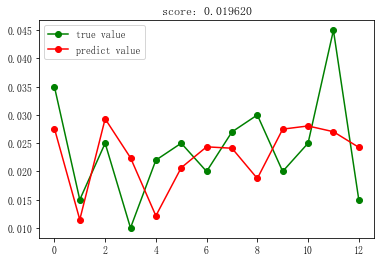

In [17]:
show_result(model_LinearRegression)

In [22]:
test_y

74     0.035
71     0.015
26     0.025
30     0.010
110    0.022
35     0.025
120    0.020
70     0.027
105    0.030
57     0.020
87     0.025
2      0.045
63     0.015
Name: Rc, dtype: float64

**岭回归**

In [18]:
selected_feature=['前三年承诺覆盖率', '动态市盈率', '成立年限', '大股东持股比例', '最近一个完整会计年度对第一大客户的销售占比', 'D/(D+E)', '净利润增长率', '存货周转率', '固定资产周转率', '流动比率', '资产负债率', '毛利率', '研发支出占比']

In [19]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [20]:
train_X,test_X,train_y,test_y = train_test_split(new_X,target, test_size = 0.1, random_state=22)

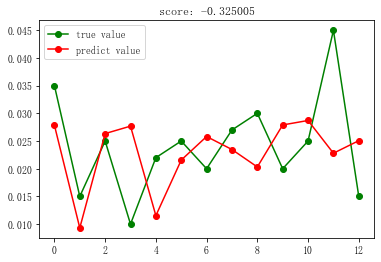

In [21]:
show_result(model_RidgeCV)

**AdaBoost**

In [23]:
new_data=unique_risk[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
new_X=ss.fit_transform(new_data)

In [24]:
train_X,test_X,train_y,test_y = train_test_split(new_X,y, test_size = 0.1, random_state=22)

In [25]:
from sklearn import tree
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator=RidgeCV(alphas=[ 0.1,  1. , 10. ]), learning_rate=0.1, n_estimators= 25)

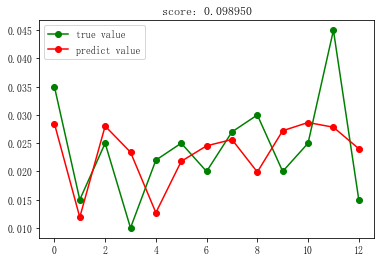

In [33]:
show_result(model_AdaBoostRegressor)

**MLP**

In [34]:
new_data=unique_risk[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
new_X=ss.fit_transform(new_data)

In [36]:
train_X,test_X,train_y,test_y = train_test_split(new_X,y, test_size = 0.1, random_state=2)

In [37]:
model_MLPRegressor=MLPRegressor(activation= 'relu', alpha=0.0001, hidden_layer_sizes= (5, 5, 5, 5), learning_rate='constant', solver= 'lbfgs')

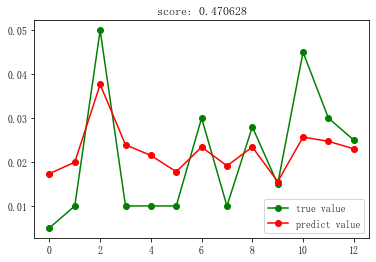

In [39]:
show_result(model_MLPRegressor)

**XGBoost**

In [40]:
new_data=unique_risk.drop(labels=['Rc'],axis=1)
new_X = ss.fit_transform(new_data)

In [41]:
train_X,test_X,train_y,test_y = train_test_split(new_X,y, test_size = 0.1, random_state=22)

In [42]:
model_XGBRegressor= xgb.XGBRegressor(booster='gbtree', eta= 0.2, gamma= 0, max_depth= 7, min_child_weight= 10)

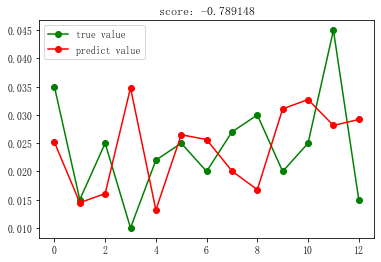

In [43]:
show_result(model_XGBRegressor)

**LGBM**

In [44]:
selected_feature=['上一年归母净利润（万元）', '承诺期业绩增长率', '前三年承诺覆盖率', '静态市盈率', '动态市盈率', '成立年限', '大股东持股比例', 'D/(D+E)', '总资产增长率', '净利润增长率', '总资产周转率', '存货周转率', '应收账款周转率', '固定资产周转率', '流动比率', '资产负债率', '（固定资产+土地）/归母权益', '净资产收益率', '毛利率']

In [45]:
new_data=unique_risk[selected_feature]
new_X=ss.fit_transform(new_data)

In [46]:
train_X,test_X,train_y,test_y = train_test_split(new_X,y, test_size = 0.1, random_state=22)

In [47]:
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

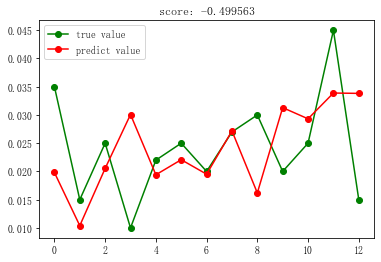

In [49]:
show_result(model_LGBMRegressor)

## 5 展望

&emsp;由于本次的因变量的分布较为集中，因此可以将其转换为1-5档的多分类问题后，再根据实际情况在相应区间内进行调整。(比如通过KNN的方法，基于相似的公司具有相同的特有风险的假设，寻找K家比较相似的公司，对新样本进行预测。在《特有风险raw》中已经给出了展示，在测试集上具有不错的成绩。)<br>
&emsp; 对于行业的分类也可以作为一个变量，通过编码的方式作为机器学习的一个属性。<br>
&emsp;从交叉验证的结果中可以看出，不同的抽样会导致模型的得分具有很大的差别。因此原始数据集存在特殊值，可以进一步优化。比如，手动KFold分组，根据结果求差集。或者使用留一交叉验证进行筛选。使用ifroest或者One-SVM根据实际结果来看使得模型表现结果变差。具体原因待后续研究。<br>
&emsp;RFECV是基于他贪心算法进行特征选择。由于组合最优化问题往往是NPC问题。因此考虑通过如模拟退火、遗传算法、蚁群算法等现在启发式算法进行优化，得出最优解。并且这些算法不会再被coef_ 或者 feature_importance这种系数属性所限制，具有更广泛的通用性。<br>
&emsp;机器学习的特征选择只对根据变量和因变量的相关性进行研究，并计算出相应的答案；并不能说明之间存在因果关系。在实际评估的过程中依旧需要根据会计和评估常识进行鉴别。此外，由于模型的复杂度和不可解释性，建议在小样本上依旧使用传统的基于方程的数学模型。<br>
&emsp;并且由于机器学习模型的复杂性，当我们发现某一个参数或者特征存在问题时，我们往往无法手动像线性回归一样手动调整一因子解决问题，而只能通过调整样本的权重或者输入更多的数据来解决问题。<br>
&emsp;机器学习需要建立在大量数据集的基础上。从《特有风险short》和《特有风险raw》的对比中我们可以看出，相比传统的基于方程的数学模型，机器学习模型超参数的选择更容易受到超参数和异常值的影响，因此需要通过对异常值进行筛选，并通过海量数据来消除随机梯度下降的随机性对超参数的影响，从而获得更好的超参数。

对于测试集各模型的表现如下

**结果对比**<br>

| 模型 | 5折交叉验证预期 | 测试集表现 |
|------|----------|------|
| 神经网络回归  | 0.0974 | 0.4706 |
| Adaboost回归  | 0.17 | 0.0989   |
|线性回归|0.1726 | 0.0196 |
|岭回归| 0.1865 | -0.3250 |
| LGBM回归     | 0.13 | -0.499    |
| XGBOOST回归   | 0.0973 | -0.789  |





 &emsp;测试集的表现和训练集的表现有很大的差别。LGBM和XGBoost表现垫底。但在修订的short版中，对数据异常值进行筛选后，模型有很大的优化、这两种算法可能对异常值比较敏感。<br>
 &emsp;测试集的表现和训练集的表现有很大的差别,5-折交叉验证只能作为一个参考，最好还是通过大量数据集将数据分成训练集、验证集、测试集。交叉验证的平均值并不能完全表现一个模型的表现,特别是当某一个组别的得分远远低于其他分组时，平均值会产生很大的误导。特别是岭回归表现垫底出乎意外。<br>
 &emsp;需要指出的是，虽然K折交叉验证的结果往往不具备模型间的可比较性，但是往往能选择出模型中最好的特征和超参数组合。<br>
 &emsp;非线性模型由于模型的复杂度因此往往能取得更好的表现、

## 6 用分类的思路去解决问题，以KNN为例

 &emsp;基于相似的公司会有相似的特有风险。在通过iforest删除了离群点后，通过KNN回归，以分类的思路对公司的特有风险进行评估

In [70]:
score=[]
score=cross_val_score(model_KNeighborsRegressor,new_X_i,y_i,cv=5,scoring='r2')
score.mean()

0.037795037474365675

In [62]:
new_data_i=unique_risk_i[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
new_X_i=ss.fit_transform(new_data_i)

In [65]:
train_X,test_X,train_y,test_y = train_test_split(new_X_i,y_i, test_size = 0.1, random_state=22)

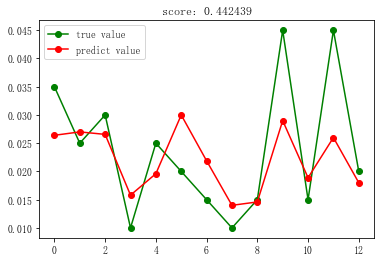

In [71]:
show_result(model_KNeighborsRegressor)